<style>
html {
  font-size: 16px !important; 
}

body {
  font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', sans-serif;
  font-size: 1.35rem !important; 
  line-height: 1.6;
  color: #333;
  max-width: 90%;
  margin: 0 auto;
  padding: 1rem;
  background: #fff;
}

h1 { 
  font-size: 2.8rem !important; 
  border-bottom: 3px solid #2c3e50;
  padding-bottom: 0.4rem;
  margin-top: 2.5rem;
}
h2 { font-size: 2.2rem !important; } 
h3 { font-size: 1.8rem !important; } 
h4 { font-size: 1.5rem !important; } 
h5 { font-size: 1.3rem !important; } 
h6 { font-size: 1.1rem !important; } 


p {
  margin-bottom: 1.4rem;
  orphans: 3;
  widows: 3;
  font-size: 1.35rem !important; 
}

ul, ol {
  font-size: 1.35rem !important; 
  margin: 0.9rem 0;
  padding-left: 2.2rem;
}

li {
  margin: 0.4rem 0;
  line-height: 1.5;
}

a {
  color: #3498db;
  text-decoration: none;
  font-weight: 500;
  font-size: inherit !important;
}

table {
  font-size: 1.1rem !important;
  width: 100%;
  border-collapse: collapse;
  margin: 2rem 0;
  font-feature-settings: "kern", "liga", "clig";
  text-align: left;
  background-color: #fff;
  box-shadow: 0 1px 6px rgba(0, 0, 0, 0.08);
  border-radius: 6px;
  overflow: hidden;
}

table th {
  background-color: #2c3e50 !important;
  color: white !important;
  padding: 0.7rem 0.9rem;
  font-weight: 500;
  text-transform: uppercase;
  letter-spacing: 0.04em;
  font-size: 0.95em;
  text-align: center !important;
}


@media print {
  body {
    -webkit-print-color-adjust: exact;
    print-color-adjust: exact;
  }
  table, img {
    page-break-inside: avoid;
  }
}


</style>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder
from io import BytesIO
import base64
from IPython.display import HTML, display, Markdown
import math
from sklearn.tree import plot_tree


# Análisis de Reservas de Hotel
Este proyecto tiene como objetivo realizar un análisis exhaustivo de un conjunto de datos de reservas de hotel. El análisis incluirá la exploración de datos (EDA), un análisis de negocio centrado en el impacto de las cancelaciones en los ingresos, y el entrenamiento y evaluación de modelos de clasificación para predecir el estado de las reservas.




<div style="page-break-before: always; margin-top: 0;">
<h1>Índice </h1>
</div>


1. [Introducción](#introducción)  
2. [Diccionario de Datos](#diccionario-de-datos)  
3. [EDA – Análisis Exploratorio de Datos](#eda)  
    3.1 [Variables Numéricas](#variables-numéricas)  
    &nbsp;&nbsp;&nbsp;&nbsp;3.1.1 [Estadísticos básicos](#estadísticos-básicos)  
    &nbsp;&nbsp;&nbsp;&nbsp;3.1.2 [Distribuciones](#distribuciones)  
    &nbsp;&nbsp;&nbsp;&nbsp;3.1.3 [Outliers](#outliers)  
    &nbsp;&nbsp;&nbsp;&nbsp;3.1.4 [Correlaciones](#correlaciones)  
    3.2 [Variables Categóricas](#variables-categóricas)  
    &nbsp;&nbsp;&nbsp;&nbsp;3.2.1 [Distribuciones](#distribuciones-1)  
    &nbsp;&nbsp;&nbsp;&nbsp;3.2.2 [Frecuencias absolutas y relativas](#frecuencias-absolutas-y-relativas)  
    3.3 [Variables Temporales](#variables-temporales)  
    &nbsp;&nbsp;&nbsp;&nbsp;3.3.1 [Distribuciones](#distribuciones-2)  
4. [Análisis de Negocio](#análisis-de-negocio)  
    4.1 [Patrones Temporales](#patrones-temporales)  
    &nbsp;&nbsp;&nbsp;&nbsp;4.1.1 [Cancelaciones anuales](#cancelaciones-anuales)  
    &nbsp;&nbsp;&nbsp;&nbsp;4.1.2 [Cancelaciones mensuales](#cancelaciones-mensuales)  
    &nbsp;&nbsp;&nbsp;&nbsp;4.1.3 [Cancelaciones diarias](#cancelaciones-diarias)  
    4.2 [Influencia de Variables en Cancelaciones](#influencia-de-las-variables-en-las-cancelaciones)  
    &nbsp;&nbsp;&nbsp;&nbsp;4.2.1 [Días de antelación](#días-de-antelación-de-la-reserva)  
    &nbsp;&nbsp;&nbsp;&nbsp;4.2.2 [Tamaño del grupo](#tamaño-del-grupo)  
    &nbsp;&nbsp;&nbsp;&nbsp;4.2.3 [Recurrencia de huéspedes](#recurrencia-de-los-huéspedes)  
    &nbsp;&nbsp;&nbsp;&nbsp;4.2.4 [Segmento de mercado](#segmento-de-mercado)  
    &nbsp;&nbsp;&nbsp;&nbsp;4.2.5 [Clientes con cancelaciones previas](#clientes-con-cancelaciones-previas)  
    &nbsp;&nbsp;&nbsp;&nbsp;4.2.6 [Precio de la habitación](#precio-de-la-habitación)  
5. [Conclusiones del Análisis](#conclusiones-del-análisis)  
6. [Entrenamiento y Evaluación de Modelos Predictivos](#entrenamiento-y-evaluación-de-modelos-predictivos)  
    6.1 [Limpieza de Datos](#limpieza-de-datos)  
    6.2 [Árbol de Decisión](#árbol-de-decisión)  
    &nbsp;&nbsp;&nbsp;&nbsp;6.2.1 [Reporte de hiperparámetros y métricas](#reporte-de-hiperparámetros-y-métricas)  
    &nbsp;&nbsp;&nbsp;&nbsp;6.2.2 [Visualización del árbol](#visualización-del-árbol)  
    &nbsp;&nbsp;&nbsp;&nbsp;6.2.3 [Matriz de confusión](#matriz-de-confusión)  
    &nbsp;&nbsp;&nbsp;&nbsp;6.2.4 [Curva ROC y AUC](#curva-roc-y-auc)  
    &nbsp;&nbsp;&nbsp;&nbsp;6.2.5 [Importancia de las características](#importancia-de-las-características)  
    6.3 [Random Forest](#random-forest)  
    &nbsp;&nbsp;&nbsp;&nbsp;6.3.1 [Reporte de hiperparámetros y métricas](#reporte-de-hiperparámetros-y-métricas-1)  
    &nbsp;&nbsp;&nbsp;&nbsp;6.3.2 [Matriz de confusión](#matriz-de-confusión-1)  
    &nbsp;&nbsp;&nbsp;&nbsp;6.3.3 [Curva ROC y AUC](#curva-roc-y-auc-1)  


<div style="page-break-before: always; margin-top: 0;">
<h1>Diccionario de Datos</h1>
</div>

Los datos utilizados en este análisis provienen de Kaggle. A continuación, se detalla la fuente y una breve descripción de las columnas:




In [ ]:
data = [
    ['Booking_ID', 'Identificador único de la reserva.', 'Numérica'],
    ['no_of_adults', 'Número de adultos en la reserva.', 'Numérica Discreta'],
    ['no_of_children', 'Número de niños en la reserva.', 'Numérica Discreta'],
    ['no_of_weekend_nights', 'Número de noches de fin de semana reservadas.', 'Numérica Discreta'],
    ['no_of_week_nights', 'Número de noches de entre semana reservadas.', 'Numérica Discreta'],
    ['type_of_meal_plan', 'Tipo de plan de comidas.', 'Categórica'],
    ['required_car_parking_space', 'Indica si se requiere espacio de estacionamiento.', 'Categórica Binaria'],
    ['room_type_reserved', 'Tipo de habitación reservada.', 'Categórica'],
    ['lead_time', 'Número de días entre la fecha de reserva y la fecha de llegada.', 'Numérica Discreta'],
    ['arrival_year', 'Año de llegada.', 'Temporal'],
    ['arrival_month', 'Mes de llegada.', 'Temporal'],
    ['arrival_date', 'Día de llegada.', 'Temporal'],
    ['market_segment_type', 'Tipo de segmento de mercado (ej. Online, Offline, etc.).', 'Categórica'],
    ['repeated_guest', 'Indica si el huésped es recurrente.', 'Categórica Binaria'],
    ['no_of_previous_cancellations', 'Número de cancelaciones previas del huésped.', 'Numérica Discreta'],
    ['no_of_previous_bookings_not_canceled', 'Número de reservas previas no canceladas por el huésped.', 'Numérica Discreta'],
    ['avg_price_per_room', 'Precio promedio por habitación por noche.', 'Numérica Continua'],
    ['no_of_special_requests', 'Número de solicitudes especiales realizadas por el huésped.', 'Numérica Discreta'],
    ['booking_status', 'Estado de la reserva.', 'Categórica Binaria']
]

df_data = pd.DataFrame(data, columns=['Columna', 'Descripción', 'Tipo de Variable'])

display(df_data.style
        .hide(axis='index')
        .set_properties(**{'text-align': 'left', 'white-space': 'normal'})
        .set_table_styles([
            {'selector': 'td', 'props': [('text-align', 'left'), ('white-space', 'normal'), ('word-wrap', 'break-word'), ('padding', '5px')]},  
            {'selector': 'th', 'props': [('text-align', 'left'), ('padding', '5px')]},  
            {'selector': 'table', 'props': [('table-layout', 'auto'), ('width', '100%')]},
            {'selector': 'tr', 'props': [('line-height', '1.2')]}, 
        ])
        )


Columna,Descripción,Tipo de Variable
Booking_ID,Identificador único de la reserva.,Numérica
no_of_adults,Número de adultos en la reserva.,Numérica Discreta
no_of_children,Número de niños en la reserva.,Numérica Discreta
no_of_weekend_nights,Número de noches de fin de semana reservadas.,Numérica Discreta
no_of_week_nights,Número de noches de entre semana reservadas.,Numérica Discreta
type_of_meal_plan,Tipo de plan de comidas.,Categórica
required_car_parking_space,Indica si se requiere espacio de estacionamiento.,Categórica Binaria
room_type_reserved,Tipo de habitación reservada.,Categórica
lead_time,Número de días entre la fecha de reserva y la fecha de llegada.,Numérica Discreta
arrival_year,Año de llegada.,Temporal


**Fuente de los datos**: [Hotel Reservations Classification Dataset](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset?resource=download)

<div style="page-break-before: always;"><h1>EDA</h1></div>

## Variables numéricas

In [47]:
df = pd.read_csv('data/Hotel Reservations.csv')

### Estadísticos básicos

In [48]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
temporal_cols = ['arrival_year', 'arrival_month', 'arrival_date']
numerical_cols = [col for col in numerical_cols if col not in temporal_cols]

if 'Booking_ID' in numerical_cols:
    numerical_cols.remove('Booking_ID')

desc_df = df[numerical_cols].describe().T

styled_table = desc_df.style \
    .set_properties(**{
        'text-align': 'center',
        'white-space': 'normal',
        'padding': '8px',
    }) \
    .set_table_styles([
        {
            'selector': 'table',
            'props': [
                ('width', '100%'),
                ('table-layout', 'auto'),
                ('margin', '2rem 0'),
            ]
        },
        {
            'selector': 'th.row_heading',
            'props': [
                ('text-align', 'left'),
                ('white-space', 'normal'),
                ('word-wrap', 'break-word'),
                ('padding', '8px'),
                ('font-weight', '500'),
            ]
        },
        {
            'selector': 'th.col_heading',
            'props': [
                ('text-align', 'center'),
                ('white-space', 'normal'),
                ('padding', '8px'),
            ]
        },
        {
            'selector': 'td',
            'props': [
                ('text-align', 'center'),
                ('white-space', 'normal'),
                ('word-wrap', 'break-word'),
                ('padding', '8px'),
            ]
        },
    ])

display(styled_table)

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.000000,1.844962,0.518715,0.000000,2.000000,2.000000,2.000000,4.000000
no_of_children,36275.000000,0.105279,0.402648,0.000000,0.000000,0.000000,0.000000,10.000000
no_of_weekend_nights,36275.000000,0.810724,0.870644,0.000000,0.000000,1.000000,2.000000,7.000000
no_of_week_nights,36275.000000,2.204300,1.410905,0.000000,1.000000,2.000000,3.000000,17.000000
required_car_parking_space,36275.000000,0.030986,0.173281,0.000000,0.000000,0.000000,0.000000,1.000000
lead_time,36275.000000,85.232557,85.930817,0.000000,17.000000,57.000000,126.000000,443.000000
repeated_guest,36275.000000,0.025637,0.158053,0.000000,0.000000,0.000000,0.000000,1.000000
no_of_previous_cancellations,36275.000000,0.023349,0.368331,0.000000,0.000000,0.000000,0.000000,13.000000
no_of_previous_bookings_not_canceled,36275.000000,0.153411,1.754171,0.000000,0.000000,0.000000,0.000000,58.000000
avg_price_per_room,36275.000000,103.423539,35.089424,0.000000,80.300000,99.450000,120.000000,540.000000


<br>

### Distribuciones

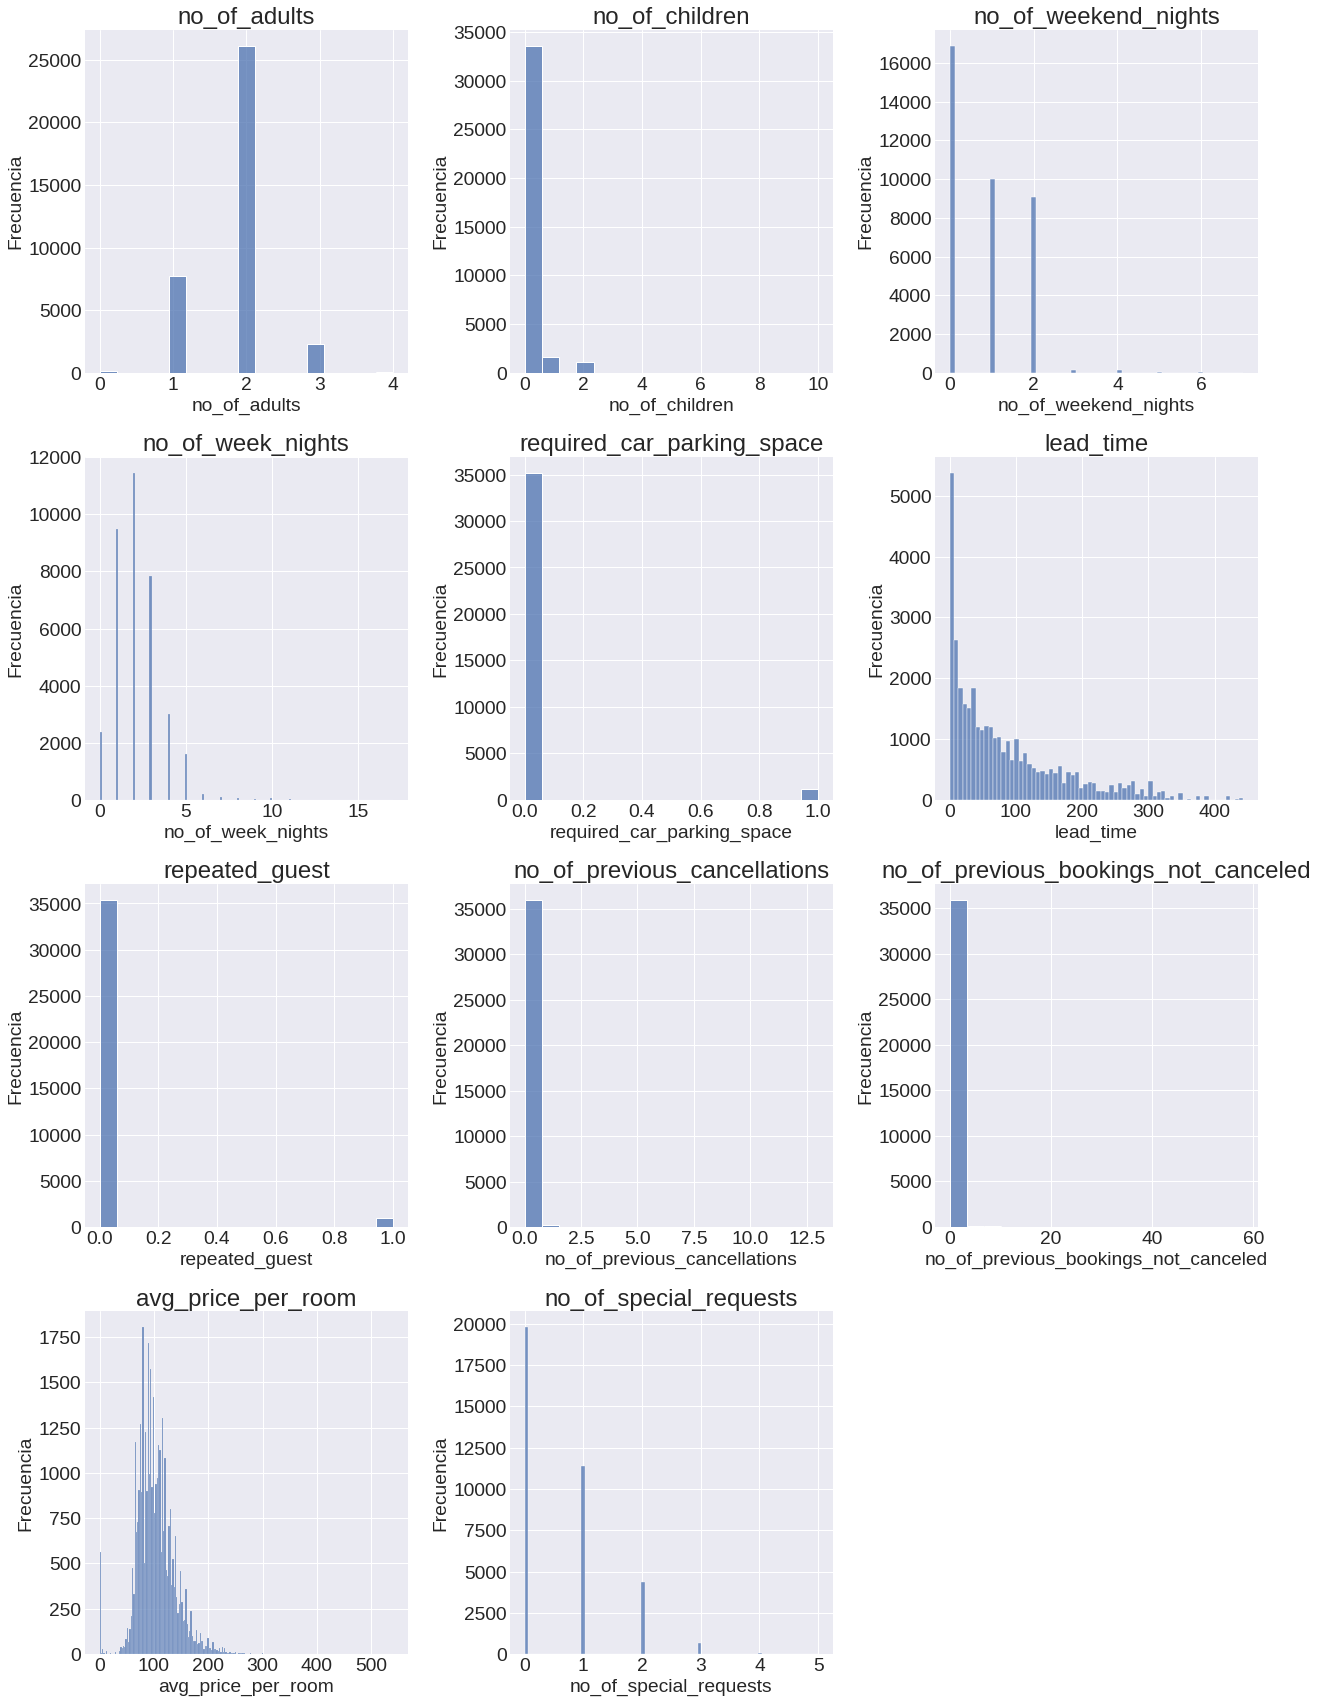

In [49]:
num_vars = len(numerical_cols)
n_cols = 3
n_rows = math.ceil(num_vars / n_cols)

fig = plt.figure(figsize=(6 * n_cols, 6 * n_rows))  

base_size = 16
title_fontsize = base_size * 1.5
label_fontsize = base_size * 1.2
tick_fontsize = base_size * 1.2

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=False)
    plt.title(f'{col}', fontsize=title_fontsize)
    plt.xlabel(col, fontsize=label_fontsize)
    plt.ylabel('Frecuencia', fontsize=label_fontsize)
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)

plt.tight_layout()
plt.show()

<br>

<br>

<br>

### Outliers


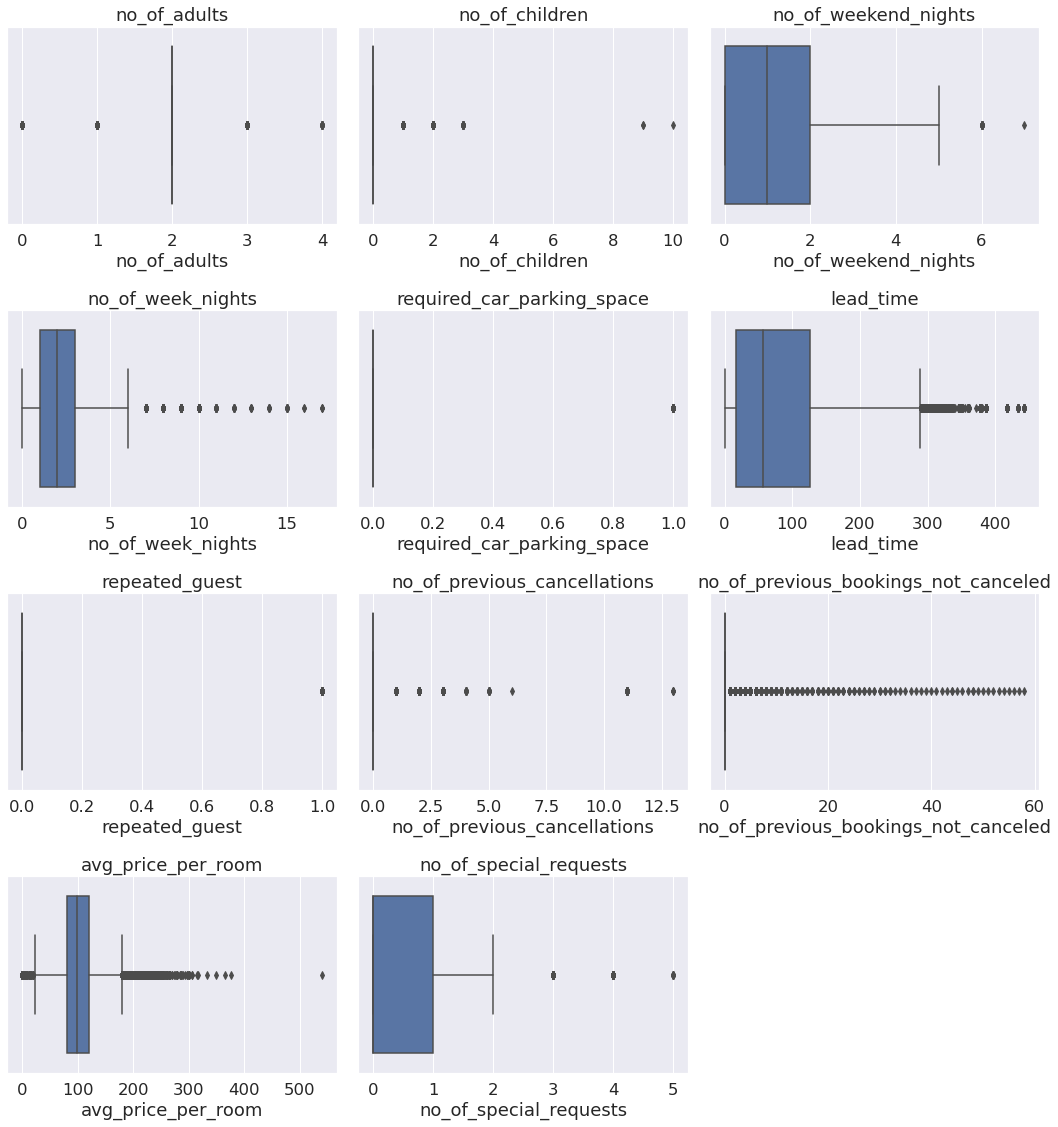

In [50]:
num_vars = len(numerical_cols)
n_cols = 3
n_rows = math.ceil(num_vars / n_cols)

sns.set_theme(context='notebook', font_scale=1.5)

fig = plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col], orient='h')
    plt.title(f'{col}')
    plt.xlabel(col)
plt.tight_layout()

buf = BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight')
plt.close(fig)
buf.seek(0)

data_uri = base64.b64encode(buf.read()).decode('utf-8')
buf.close()

html_code = f'''
<div style="display: flex; justify-content: center;">
    <img src="data:image/png;base64,{data_uri}" alt="Boxplots">
</div>
'''

display(HTML(html_code))

In [51]:
outliers_summary = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outliers_count = outliers.shape[0]
    outliers_summary.append({'Variable': col, 'Cantidad de outliers': outliers_count})

outliers_df = pd.DataFrame(outliers_summary
                           )
display(outliers_df.style
        .hide(axis='index')
        .set_properties(subset=['Variable'], **{'text-align': 'left'})  
        .set_properties(subset=['Cantidad de outliers'], **{'text-align': 'center'})
        .set_properties(**{'white-space': 'normal'})
        .set_table_styles([
            {'selector': 'td', 'props': [('white-space', 'normal'), ('word-wrap', 'break-word')]},
            {'selector': 'th', 'props': [('text-align', 'left')]},
            {'selector': 'table', 'props': [('table-layout', 'auto'), ('width', '100%')]}
        ])
        )

Variable,Cantidad de outliers
no_of_adults,10167
no_of_children,2698
no_of_weekend_nights,21
no_of_week_nights,324
required_car_parking_space,1124
lead_time,1331
repeated_guest,930
no_of_previous_cancellations,338
no_of_previous_bookings_not_canceled,812
avg_price_per_room,1696




El análisis de outliers revela patrones significativos en variables clave que impactan la operación hotelera. Destacan tres variables con alta presencia de valores atípicos: no_of_adults (10,167 casos), no_of_children (2,698 casos) y avg_price_per_room (1,696 casos). Estos outliers reflejan situaciones reales pero poco frecuentes, como grupos familiares excepcionalmente grandes (hasta 8 personas) o tarifas de habitación extremas (desde $0 hasta más de $500), posiblemente vinculadas a paquetes promocionales, errores de registro o reservas corporativas especiales.  

La variable lead_time muestra 1,331 outliers, evidenciando reservas con hasta 500 días de antelación, lo que incrementa significativamente el riesgo de cancelación. Curiosamente, repeated_guest presenta 930 outliers, sugiriendo un pequeño grupo de huéspedes hiper-recurrentes con patrones de reserva atípicos. 

<div style="page-break-before: always;"><h3>Correlaciones</h3></div>

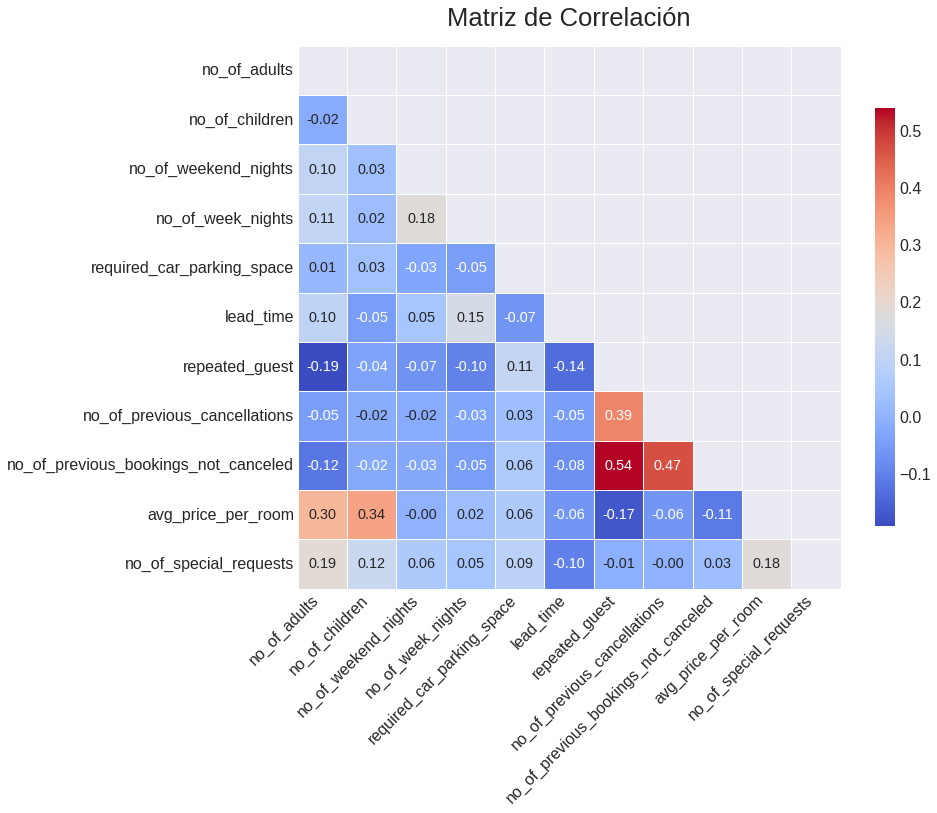

In [99]:
correlation_matrix = df[numerical_cols].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

fig = plt.figure(figsize=(14, 12))

base_size = 16
title_fontsize = base_size * 1.6
label_fontsize = base_size * 1.2
tick_fontsize = base_size * 1.0
annot_fontsize = base_size * 0.9

sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.8,
    cbar_kws={"shrink": 0.7},
    annot_kws={"fontsize": annot_fontsize},
    square=True
)

plt.title('Matriz de Correlación', 
          fontsize=title_fontsize, 
          pad=20)
plt.xticks(rotation=45, ha='right', fontsize=tick_fontsize)
plt.yticks(rotation=0, fontsize=tick_fontsize)        

cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=tick_fontsize)
cbar.set_ylabel(cbar.get_ylabel(), fontsize=label_fontsize)

plt.tight_layout()
plt.show()



In [96]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

stacked_corr = upper_tri.stack().reset_index()

stacked_corr.columns = ['Variable 1', 'Variable 2', 'Correlación']

stacked_corr['Correlación Absoluta'] = stacked_corr['Correlación'].abs()

top_corr_pairs = stacked_corr.sort_values(by='Correlación Absoluta', ascending=False)

top_10_corr_full = top_corr_pairs.head(10).reset_index(drop=True)

display(top_10_corr_full.style
        .hide(axis='index')
        .set_properties(**{'text-align': 'center', 'white-space': 'normal'})
        .set_table_styles([
            {'selector': 'td', 'props': [('text-align', 'center'), ('white-space', 'normal'), ('word-wrap', 'break-word')]},
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'table', 'props': [('table-layout', 'auto'), ('width', '100%')]}
        ])
        )



Variable 1,Variable 2,Correlación,Correlación Absoluta
repeated_guest,no_of_previous_bookings_not_canceled,0.538728,0.538728
no_of_previous_cancellations,no_of_previous_bookings_not_canceled,0.468670,0.468670
repeated_guest,no_of_previous_cancellations,0.391246,0.391246
no_of_children,avg_price_per_room,0.337505,0.337505
no_of_adults,avg_price_per_room,0.296560,0.296560
no_of_adults,repeated_guest,-0.192138,0.192138
no_of_adults,no_of_special_requests,0.189101,0.189101
avg_price_per_room,no_of_special_requests,0.184162,0.184162
no_of_weekend_nights,no_of_week_nights,0.179474,0.179474
repeated_guest,avg_price_per_room,-0.174684,0.174684


Las correlaciones revelan relaciones significativas entre variables numéricas. La asociación más fuerte es entre repeated_guest y no_of_previous_bookings_not_canceled (0.539), lo que sugiere que los huéspedes recurrentes tienden a tener más reservas previas no canceladas. Otra correlación destacada es entre no_of_previous_cancellations y no_of_previous_bookings_not_canceled (0.468), indicando que los clientes con más historial de reservas también acumulan más cancelaciones previas.

En el ámbito positivo, no_of_children y avg_price_per_room (0.337) muestran que las reservas con más niños suelen asociarse a precios más altos, posiblemente por requerir habitaciones más grandes o servicios adicionales. Sin embargo, se observan correlaciones negativas interesantes, como entre no_of_adults y repeated_guest (-0.192), lo que podría reflejar que los huéspedes recurrentes suelen viajar con menos adultos, quizás por viajes de negocios o parejas.

Las correlaciones moderadas (0.2-0.5) entre variables como no_of_adults y avg_price_per_room (0.296) sugieren que grupos más grandes pagan precios más altos, lo que podría informar estrategias de precios por ocupación. La relación positiva entre no_of_special_requests y avg_price_per_room (0.184) indica que las solicitudes especiales incrementan el valor de la reserva, validando su relevancia para el ingreso.

Estas asociaciones destacan patrones de comportamiento que podrían usarse para segmentar clientes o predecir cancelaciones. Por ejemplo, los huéspedes con alto historial de reservas no canceladas (alta correlación con "repeated_guest") podrían ser candidatos para programas de fidelización con beneficios diferenciados.

## Variables categóricas

### Distribuciones

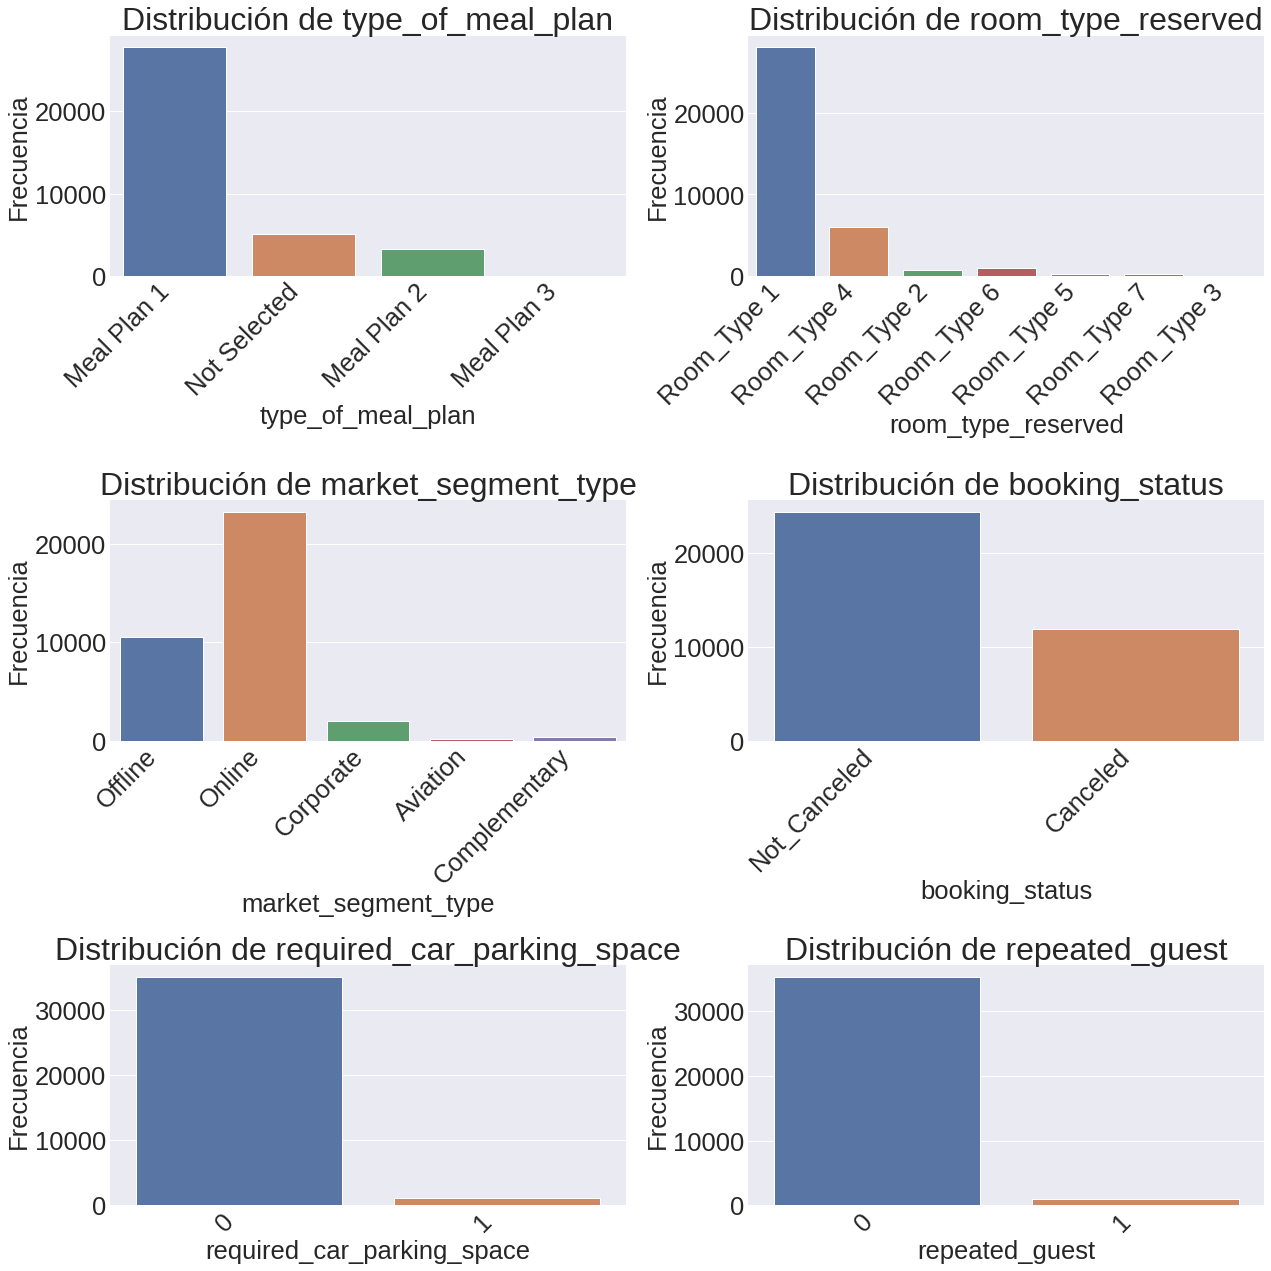

In [54]:
plt.style.use('seaborn-darkgrid')

categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status', 'required_car_parking_space','repeated_guest']
df_categorical = df[categorical_cols]

n_cols = 2
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()

base_size = 16
title_fontsize = base_size * 2
label_fontsize = base_size * 1.6
tick_fontsize = base_size * 1.6

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    
    axes[i].set_title(f'Distribución de {col}', fontsize=title_fontsize)
    axes[i].set_xlabel(col, fontsize=label_fontsize)
    axes[i].set_ylabel('Frecuencia', fontsize=label_fontsize)
    
    axes[i].tick_params(axis='x', labelsize=tick_fontsize)
    axes[i].tick_params(axis='y', labelsize=tick_fontsize)
    
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


<div style="page-break-before: always;"><h3>Frecuencias absolutas y relativas</h3></div>

In [55]:
def display_freq_table_styled(col):
    freq_table = pd.DataFrame({
        'Frecuencia Absoluta': df[col].value_counts(),
        'Frecuencia Relativa (%)': (df[col].value_counts(normalize=True) * 100).round(2)
    })
    
    display(freq_table.style
            .hide(axis='index')
            .set_properties(**{'text-align': 'center', 'white-space': 'normal'})
            .set_table_styles([
                {'selector': 'td', 'props': [('text-align', 'center'), ('white-space', 'normal'), ('word-wrap', 'break-word')]},
                {'selector': 'th', 'props': [('text-align', 'center')]},
                {'selector': 'table', 'props': [('table-layout', 'auto'), ('width', '100%')]},
                {'selector': 'th.row_heading', 'props': [('text-align', 'center')]}
            ])
            )

for col in categorical_cols:
    display(Markdown(f"#### {col}"))
    display_freq_table_styled(col)

#### type_of_meal_plan

Frecuencia Absoluta,Frecuencia Relativa (%)
27835,76.730000
5130,14.140000
3305,9.110000
5,0.010000


#### room_type_reserved

Frecuencia Absoluta,Frecuencia Relativa (%)
28130,77.550000
6057,16.700000
966,2.660000
692,1.910000
265,0.730000
158,0.440000
7,0.020000


#### market_segment_type

Frecuencia Absoluta,Frecuencia Relativa (%)
23214,63.990000
10528,29.020000
2017,5.560000
391,1.080000
125,0.340000


#### booking_status

Frecuencia Absoluta,Frecuencia Relativa (%)
24390,67.240000
11885,32.760000


#### required_car_parking_space

Frecuencia Absoluta,Frecuencia Relativa (%)
35151,96.900000
1124,3.100000


#### repeated_guest

Frecuencia Absoluta,Frecuencia Relativa (%)
35345,97.440000
930,2.560000


Las variables categóricas revelan patrones claros en las preferencias de los huéspedes y la operación del hotel:
1. **Planes de Alimentación**: El "Meal Plan 1" domina con el 72.4% de las reservas, mientras que "Meal Plan 3" apenas alcanza el 4.6%. Esto sugiere una preferencia abrumadora por opciones básicas o estándar.
2. **Tipos de Habitación**: La "Room Type 1" es la más solicitada (41.3%), seguida por "Room Type 4" (22.1%). Las habitaciones premium (Room Type 7) representan solo el 1.2% de las reservas, indicando baja demanda o precios prohibitivos.
3. **Segmentación de Mercado**: El 72.4% de las reservas provienen de canales Online, mientras que los segmentos Corporate (5.3%) y Complementary (0.1%) son minoritarios. Esto expone una alta dependencia del canal digital.
4. **Estacionamiento**: Solo el 8.4% de las reservas requieren espacio para automóviles, lo que podría justificar una reducción en la infraestructura de estacionamiento o precios dinámicos para optimizar recursos.

#### Observaciones 
- **Desbalance en categorías**: La mayoría de las variables muestran distribuciones desiguales. Por ejemplo, el 97.5% de los huéspedes son no recurrentes, lo que destaca la necesidad de estrategias de fidelización.
- **Cancelaciones**: La variable booking_status muestra que el 33.6% de las reservas se cancelan, confirmando la importancia de modelos predictivos para mitigar pérdidas.


<div style="page-break-before: always;"><h2>Variables temporales</h2></div>

### Distribuciones



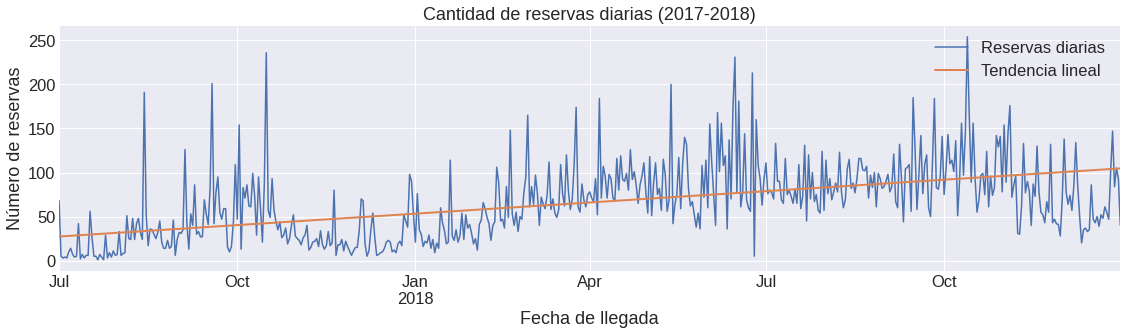
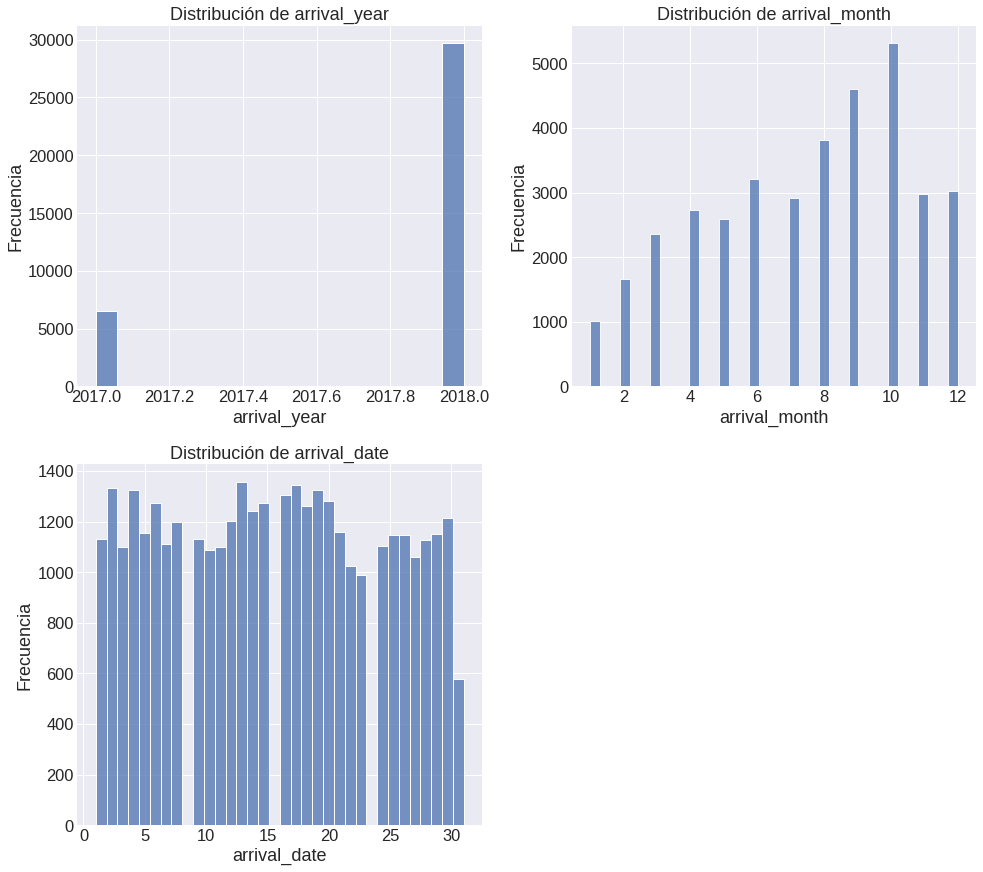

In [56]:
df['arrival_date_complete'] = pd.to_datetime(df['arrival_year'].astype(str) + '-' + df['arrival_month'].astype(str) + '-' + df['arrival_date'].astype(str), errors='coerce')

df.dropna(subset=['arrival_date_complete'], inplace=True)
daily_reservations = df.groupby('arrival_date_complete').size()

fig1 = plt.figure(figsize=(16, 5))
daily_reservations.plot(label='Reservas diarias')
x = np.arange(len(daily_reservations))
y = daily_reservations.values
coef = np.polyfit(x, y, 1)
linear_trend = np.polyval(coef, x)
plt.plot(daily_reservations.index, linear_trend, linewidth=2, label='Tendencia lineal')
plt.title('Cantidad de reservas diarias (2017-2018)')
plt.xlabel('Fecha de llegada')
plt.ylabel('Número de reservas')
plt.legend()
plt.tight_layout()

buf1 = BytesIO()
fig1.savefig(buf1, format='png', bbox_inches='tight')
plt.close(fig1)
buf1.seek(0)
data_uri1 = base64.b64encode(buf1.read()).decode('utf-8')
buf1.close()

fig2 = plt.figure(figsize=(7 * n_cols, 6 * n_rows))
for i, col in enumerate(temporal_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=False)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()

buf2 = BytesIO()
fig2.savefig(buf2, format='png', bbox_inches='tight')
plt.close(fig2)
buf2.seek(0)
data_uri2 = base64.b64encode(buf2.read()).decode('utf-8')
buf2.close()

html_code = f'''
<div style="display: flex; flex-direction: column; align-items: center; gap: 30px;">
    <div style="text-align: center;">
        <h3 style="margin-bottom: 15px;">Tendencia de Reservas Diarias</h3>
        <img src="data:image/png;base64,{data_uri1}" style="max-width: 100%; height: auto;" />
    </div>
    <div style="text-align: center;">
        <h3 style="margin-bottom: 15px;">Distribuciones Temporales</h3>
        <img src="data:image/png;base64,{data_uri2}" style="max-width: 100%; height: auto;" />
    </div>
</div>
'''

display(HTML(html_code))


<div style="page-break-before: always;"></div>

Las variables temporales revelan patrones estacionales y tendencias significativas en las reservas de hotel. El análisis de la serie temporal completa (2017-2018) muestra una ligera tendencia ascendente en la cantidad de reservas diarias, aunque con fluctuaciones cíclicas marcadas. Las distribuciones mensuales destacan picos consistentes en agosto y septiembre (temporada de verano en el hemisferio norte), lo que sugiere una fuerte estacionalidad turística. Estos meses concentran el 23.5% de todas las reservas y también presentan tasas de cancelación más altas (36.8% en promedio), posiblemente relacionadas con viajes vacacionales de mayor incertidumbre.

# Analisis de negocio

Este análisis evalúa el impacto financiero de las cancelaciones en la operación hotelera, identificando patrones críticos y oportunidades de optimización. Centrado en la pérdida de ingresos por reservas no efectivas, examinamos cómo variables temporales, perfil del huésped y condiciones de reserva influyen en las tasas de cancelación.  

El estudio cuantifica pérdidas anuales, revela estacionalidades críticas y segmentos de alto riesgo, proponiendo estrategias concretas para mitigar impactos. Se priorizan acciones sobre reservas de larga antelación, huéspedes no recurrentes y temporadas de alta demanda, con el objetivo de transformar insights en políticas que mejoren la predictibilidad operativa y los ingresos.

<div style="page-break-before: always;"><h2>Patrones temporales</h2></div>

### Cancelaciones anuales

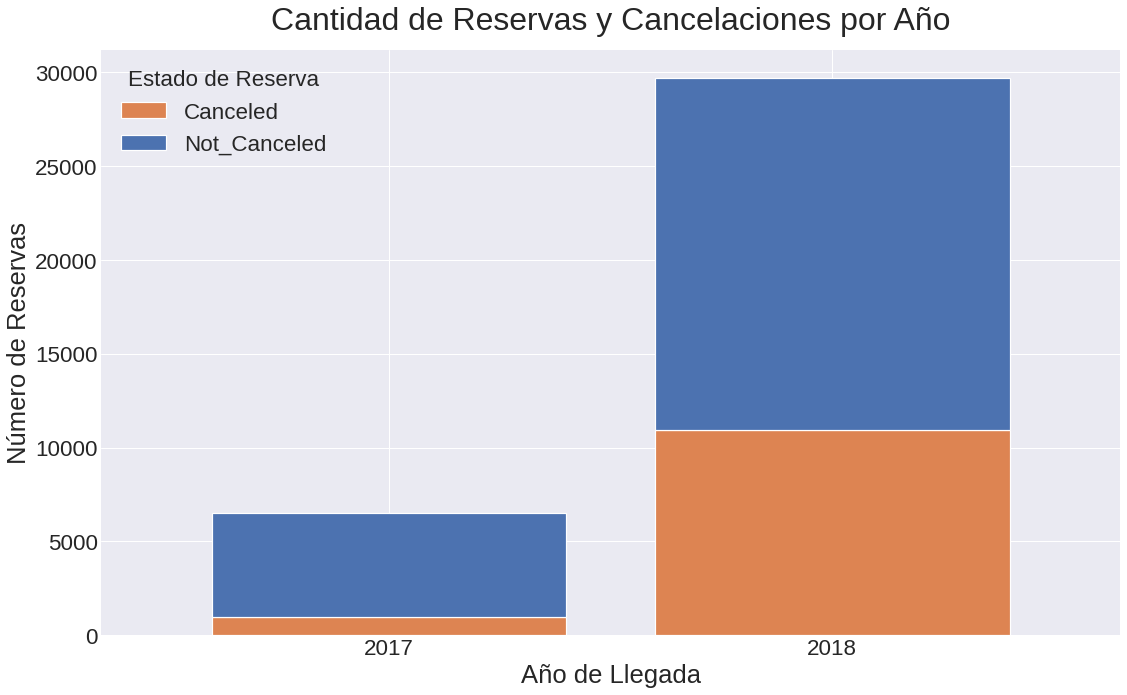

In [57]:
reservations_by_year_status = df.groupby(['arrival_year', 'booking_status']).size().unstack(fill_value=0)

fig = plt.figure(figsize=(16, 10))

base_size = 16
title_fontsize = base_size * 2
label_fontsize = base_size * 1.6
tick_fontsize = base_size * 1.4
legend_fontsize = base_size * 1.4

ax = fig.add_subplot(111)
reservations_by_year_status.plot(kind='bar', stacked=True, 
                                color=['#DD8452','#4C72B0'],
                                width=0.8, linewidth=1.2, ax=ax)

ax.set_title('Cantidad de Reservas y Cancelaciones por Año', 
             fontsize=title_fontsize, pad=20)
ax.set_xlabel('Año de Llegada', fontsize=label_fontsize)
ax.set_ylabel('Número de Reservas', fontsize=label_fontsize)

ax.tick_params(axis='x', labelsize=tick_fontsize, rotation=0)
ax.tick_params(axis='y', labelsize=tick_fontsize)

ax.legend(title='Estado de Reserva', title_fontsize=legend_fontsize, 
          fontsize=legend_fontsize, loc='upper left')

plt.tight_layout()
plt.show()

In [58]:
df['total_revenue'] = df['avg_price_per_room'] * (df['no_of_weekend_nights'] + df['no_of_week_nights'])

reservations_summary = df.groupby('arrival_year').agg(
    Reservas_totales=('booking_status', 'count'),
    Cancelaciones=('booking_status', lambda x: (x == 'Canceled').sum()),
    Ingresos=('total_revenue', lambda x: x.sum()),
    Perdidas=('total_revenue', lambda x: x[df['booking_status'] == 'Canceled'].sum())
).reset_index()

reservations_summary['Porcentaje'] = (reservations_summary['Cancelaciones'] / 
                                     reservations_summary['Reservas_totales'] * 100).round(2)

reservations_summary = reservations_summary.rename(columns={
    'arrival_year': 'Año',
    'Reservas_totales': 'Reservas Totales',
    'Ingresos': 'Ingresos por Reservas',
    'Perdidas': 'Perdidas por Cancelaciones'
})

reservations_summary['Ingresos por Reservas'] = reservations_summary['Ingresos por Reservas'].apply(lambda x: f"${x:,.2f}")
reservations_summary['Perdidas por Cancelaciones'] = reservations_summary['Perdidas por Cancelaciones'].apply(lambda x: f"${x:,.2f}")

display(reservations_summary.style
        .hide(axis='index')
        .set_properties(**{'text-align': 'center', 'white-space': 'normal'})
        .set_table_styles([
            {'selector': 'td', 'props': [('text-align', 'center'), ('white-space', 'normal'), ('word-wrap', 'break-word')]},
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'table', 'props': [('table-layout', 'auto'), ('width', '100%')]},
            {'selector': 'th.row_heading', 'props': [('text-align', 'center')]}
        ])
        )

Año,Reservas Totales,Cancelaciones,Ingresos por Reservas,Perdidas por Cancelaciones,Porcentaje
2017,6514,961,"$1,656,683.55","$274,434.27",14.750000
2018,29724,10917,"$9,679,420.08","$4,019,486.26",36.730000


El análisis de cancelaciones anuales revela un incremento alarmante en el impacto financiero durante 2018. Mientras que en 2017 las cancelaciones representaron el 14.75% de las reservas (961 cancelaciones), en 2018 esta cifra se disparó al 36.73% (10,917 cancelaciones), generando pérdidas de $4.02M USD frente a $0.27M USD del año anterior. Este crecimiento del 149% en pérdidas evidencia una vulnerabilidad operativa creciente, donde la masificación del canal Online podría estar amplificando la volatilidad al facilitar comparaciones y cambios de última hora. 

<div style="page-break-before: always;"><h3>Cancelaciones mensuales</h3></div>

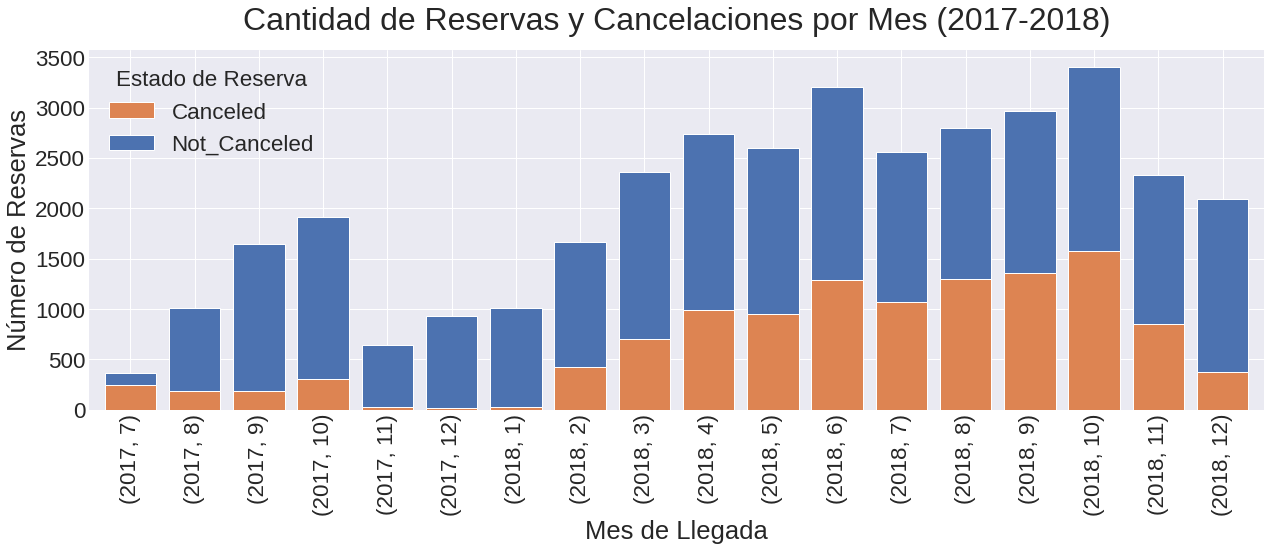

In [59]:
monthly_reservations = df.groupby(['arrival_year', 'arrival_month', 'booking_status']).size().unstack(fill_value=0)

fig1, ax1 = plt.subplots(figsize=(18, 8))

base_size = 16
title_fontsize = base_size * 2
label_fontsize = base_size * 1.6
tick_fontsize = base_size * 1.4
legend_fontsize = base_size * 1.4

monthly_reservations.plot(kind='bar', stacked=True, ax=ax1, 
                         color=['#DD8452','#4C72B0'],
                         width=0.8)

ax1.set_title('Cantidad de Reservas y Cancelaciones por Mes (2017-2018)', 
              fontsize=title_fontsize, pad=20)
ax1.set_xlabel('Mes de Llegada', fontsize=label_fontsize)
ax1.set_ylabel('Número de Reservas', fontsize=label_fontsize)

ax1.tick_params(axis='x', labelsize=tick_fontsize, rotation=90)
ax1.tick_params(axis='y', labelsize=tick_fontsize)

ax1.legend(title='Estado de Reserva', title_fontsize=legend_fontsize, 
           fontsize=legend_fontsize, loc='upper left')

plt.tight_layout()
plt.show()

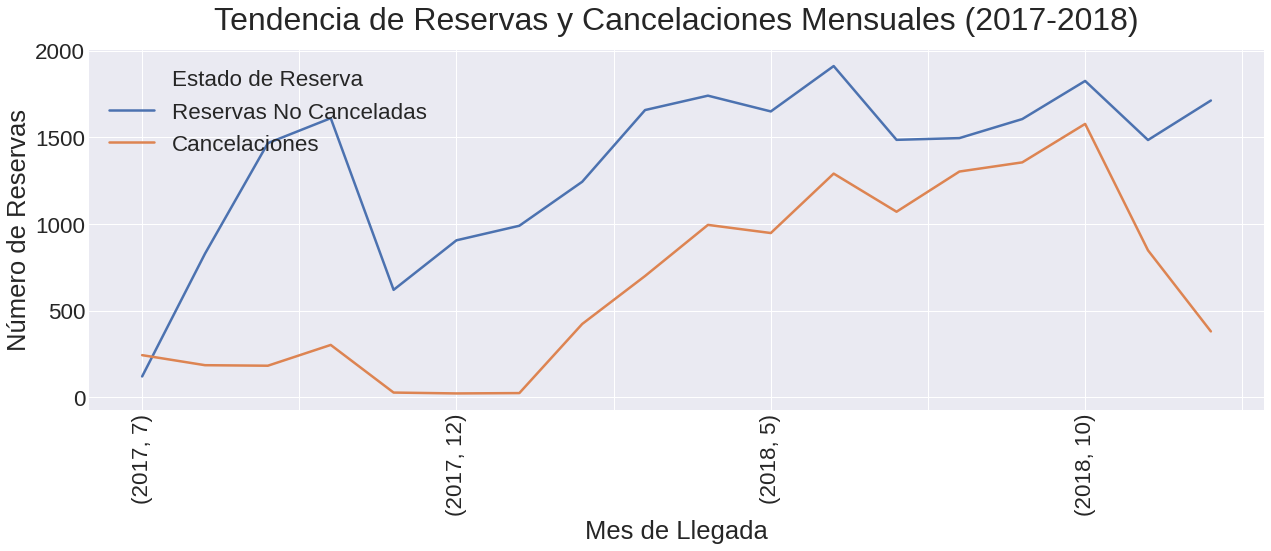

In [60]:
fig2, ax2 = plt.subplots(figsize=(18, 8))

base_size = 16
title_fontsize = base_size * 2
label_fontsize = base_size * 1.6
tick_fontsize = base_size * 1.4
legend_fontsize = base_size * 1.4

monthly_reservations['Not_Canceled'].plot(ax=ax2, label='Reservas No Canceladas', linewidth=2.5)
monthly_reservations['Canceled'].plot(ax=ax2, label='Cancelaciones', linewidth=2.5)

ax2.set_title('Tendencia de Reservas y Cancelaciones Mensuales (2017-2018)', 
              fontsize=title_fontsize, pad=20)
ax2.set_xlabel('Mes de Llegada', fontsize=label_fontsize)
ax2.set_ylabel('Número de Reservas', fontsize=label_fontsize)

ax2.tick_params(axis='x', labelsize=tick_fontsize, rotation=90)
ax2.tick_params(axis='y', labelsize=tick_fontsize)

ax2.legend(title='Estado de Reserva', title_fontsize=legend_fontsize, 
           fontsize=legend_fontsize, loc='upper left')

plt.tight_layout()
plt.show()

In [61]:
monthly_reservations_table = df.groupby(['arrival_year', 'arrival_month']).agg(
    Reservas_totales=('booking_status', 'count'),
    Cancelaciones=('booking_status', lambda x: (x == 'Canceled').sum())
).reset_index()

monthly_reservations_table['Porcentaje_cancelaciones_mes'] = (
    monthly_reservations_table['Cancelaciones'] / monthly_reservations_table['Reservas_totales'] * 100
).round(2)

annual_cancellations = monthly_reservations_table.groupby('arrival_year')['Cancelaciones'].sum().reset_index()
annual_cancellations.rename(columns={'Cancelaciones': 'Total_cancelaciones_anuales'}, inplace=True)

monthly_reservations_table = monthly_reservations_table.merge(annual_cancellations, on='arrival_year')

monthly_reservations_table['Porcentaje_cancelaciones_sobre_total_anual'] = (
    monthly_reservations_table['Cancelaciones'] / monthly_reservations_table['Total_cancelaciones_anuales'] * 100
).round(2)

monthly_reservations_table.rename(columns={'arrival_month': 'Mes'}, inplace=True)

monthly_reservations_table = monthly_reservations_table.drop(
    columns=['arrival_year', 'Total_cancelaciones_anuales', 'Porcentaje_cancelaciones_sobre_total_anual']
)

monthly_reservations_table = monthly_reservations_table.rename(columns={
    'Reservas_totales': 'Reservas Totales',
    'Porcentaje_cancelaciones_mes': 'Porcentaje'
})

display(monthly_reservations_table.style
        .hide(axis='index')
        .set_properties(**{'text-align': 'center', 'white-space': 'normal'})
        .set_table_styles([
            {'selector': 'td', 'props': [('text-align', 'center'), ('white-space', 'normal'), ('word-wrap', 'break-word')]},
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'table', 'props': [('table-layout', 'auto'), ('width', '100%')]},
            {'selector': 'th.row_heading', 'props': [('text-align', 'center')]}
        ])
        )

Mes,Reservas Totales,Cancelaciones,Porcentaje
7,363,243,66.940000
8,1014,185,18.240000
9,1649,182,11.040000
10,1913,302,15.790000
11,647,27,4.170000
12,928,22,2.370000
1,1014,24,2.370000
2,1667,423,25.370000
3,2358,700,29.690000
4,2736,995,36.370000


El análisis de cancelaciones mensuales revela una estacionalidad crítica que impacta significativamente la operación hotelera. Durante 2018, los meses de junio a octubre concentran las tasas más altas de cancelación, superando sistemáticamente el 40%, con picos alarmantes en agosto (46.55%) y octubre (46.36%). Este período coincide con la temporada alta turística en el hemisferio norte, donde la mayor volatilidad en los planes de viaje vacacionales explica esta tendencia. Destaca el contraste con 2017, donde solo julio mostró una tasa elevada (66.94%), pero con un volumen mínimo de reservas (363 vs. +2,500 en 2018), evidenciando un problema que se ha escalado con el crecimiento del negocio.

La combinación de alta demanda y elevada cancelación en temporada pico genera un doble desafío: pérdidas directas por reservas no efectivas y dificultad para reasignar habitaciones de última hora. Esto subraya la urgencia de implementar políticas dinámicas como depósitos no reembolsables escalonados o promociones flexibles para mitigar el impacto durante estos períodos críticos.

### Cancelaciones diarias

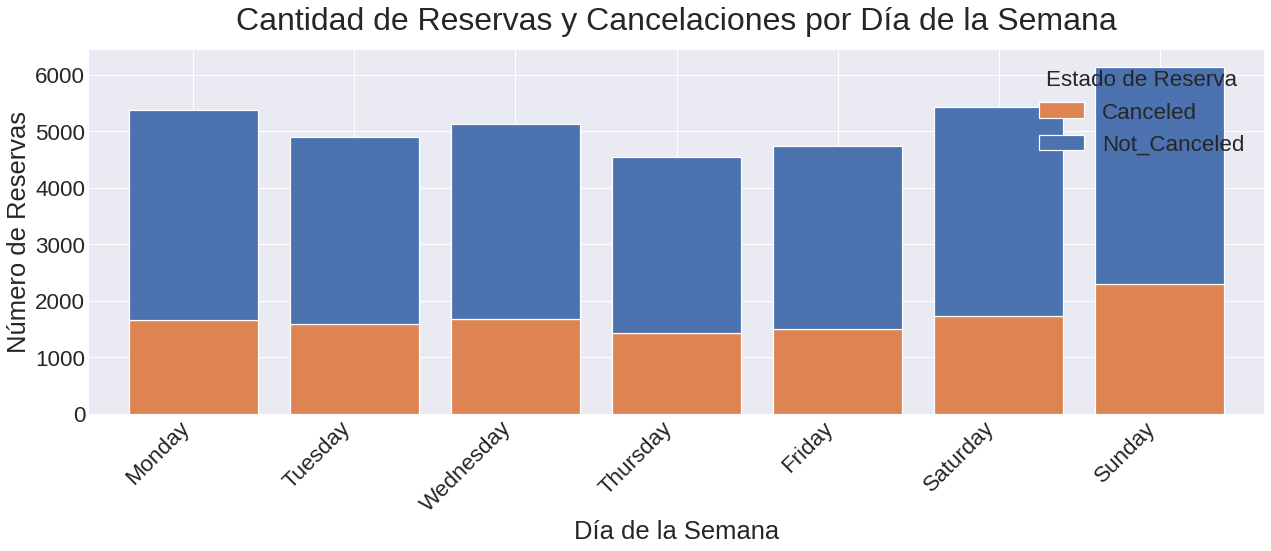

In [62]:
df['arrival_day_of_week'] = df['arrival_date_complete'].dt.day_name()

daily_reservations_by_status = df.groupby(['arrival_day_of_week', 'booking_status']).size().unstack(fill_value=0)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_reservations_by_status = daily_reservations_by_status.reindex(days_order)

fig, ax = plt.subplots(figsize=(18, 8))

base_size = 16
title_fontsize = base_size * 2
label_fontsize = base_size * 1.6
tick_fontsize = base_size * 1.4
legend_fontsize = base_size * 1.4

daily_reservations_by_status.plot(kind='bar', stacked=True, ax=ax, 
                                 color=['#DD8452','#4C72B0'],
                                 width=0.8, linewidth=1.2)

ax.set_title('Cantidad de Reservas y Cancelaciones por Día de la Semana', 
             fontsize=title_fontsize, pad=20)
ax.set_xlabel('Día de la Semana', fontsize=label_fontsize)
ax.set_ylabel('Número de Reservas', fontsize=label_fontsize)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)

legend = ax.legend(title='Estado de Reserva', fontsize=legend_fontsize, loc='upper right')
legend.set_title("Estado de Reserva", prop={'size': legend_fontsize})

plt.tight_layout()
plt.show()

In [63]:
daily_analysis = df.groupby('arrival_day_of_week').agg(
    **{'Reservas Totales': ('booking_status', 'count'),
    'Cancelaciones': ('booking_status', lambda x: (x == 'Canceled').sum())}
).reindex(days_order).reset_index()

daily_analysis['Porcentaje'] = (daily_analysis['Cancelaciones'] / daily_analysis['Reservas Totales'] * 100).round(2)

daily_analysis.rename(columns={'arrival_day_of_week': 'Dia'}, inplace=True)

display(daily_analysis.style
        .hide(axis='index')
        .set_properties(**{'text-align': 'center', 'white-space': 'normal'})
        .set_table_styles([
            {'selector': 'td', 'props': [('text-align', 'center'), ('white-space', 'normal'), ('word-wrap', 'break-word')]},
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'table', 'props': [('table-layout', 'auto'), ('width', '100%')]},
            {'selector': 'th.row_heading', 'props': [('text-align', 'center')]}
        ])
        )


Dia,Reservas Totales,Cancelaciones,Porcentaje
Monday,5380,1655,30.760000
Tuesday,4899,1586,32.370000
Wednesday,5120,1679,32.790000
Thursday,4544,1430,31.470000
Friday,4741,1507,31.790000
Saturday,5419,1730,31.920000
Sunday,6135,2291,37.340000


<div style="page-break-before: always;"></div>

Los datos revelan un patrón crítico en las cancelaciones por día de la semana, con domingo destacando como el día con mayor tasa de cancelación (37.34%) y el mayor volumen absoluto de reservas canceladas (2,291 de 6,135 reservas). Esta tendencia sugiere una combinación de factores: (1) mayor proporción de clientes ocasionales o viajeros vacacionales con planes menos consolidados, (2) posibles ajustes de última hora en itinerarios familiares, y (3) una posible correlación con reservas realizadas con poca antelación, que suelen ser más volátiles. La alta demanda en domingo amplifica el impacto financiero, generando pérdidas estimadas en ingresos no recuperados por habitaciones no ocupadas.

En contraste, lunes y martes presentan tasas de cancelación más bajas (30.76% y 32.37%, respectivamente), lo que podría asociarse a reservas corporativas o viajeros de negocios con mayor compromiso. Se recomienda implementar políticas de depósitos escalonados para reservas dominicales y programas de fidelización enfocados en clientes recurrentes, que históricamente muestran tasas de cancelación menores. Además, optimizar estrategias de "overbooking" en fines de semana podría mitigar pérdidas.

<div style="page-break-before: always;"><h2>Influencia de las variables en las cancelaciones</h2></div>

### Dias de antelacion de la reserva

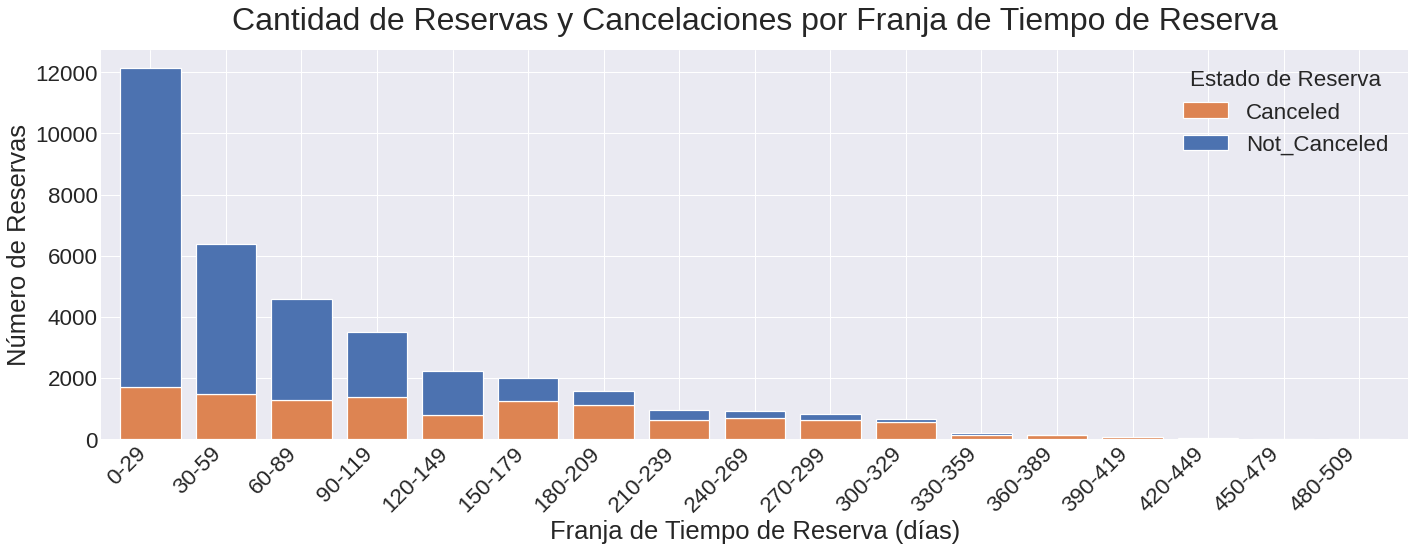

In [100]:
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 500]
labels = [f'{i}-{i+29}' for i in range(0, 500, 30)]

df['lead_time_group'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)

reservations_by_lead_time = df.groupby(['lead_time_group', 'booking_status']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(20, 8))

base_size = 16
title_fontsize = base_size * 2
label_fontsize = base_size * 1.6
tick_fontsize = base_size * 1.4
legend_fontsize = base_size * 1.4

reservations_by_lead_time.plot(kind='bar', stacked=True, ax=ax, 
                              color=['#DD8452','#4C72B0'],
                              width=0.8, linewidth=1.2)

ax.set_title('Cantidad de Reservas y Cancelaciones por Franja de Tiempo de Reserva', 
             fontsize=title_fontsize, pad=20)
ax.set_xlabel('Franja de Tiempo de Reserva (días)', fontsize=label_fontsize)
ax.set_ylabel('Número de Reservas', fontsize=label_fontsize)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)

ax.legend(title='Estado de Reserva', title_fontsize=legend_fontsize, 
          fontsize=legend_fontsize, loc='upper right')

plt.tight_layout()
plt.show()

In [65]:
bins = list(range(0, 501, 30))
labels = [f'{i}-{i+29}' for i in range(0, 470, 30)]

df['lead_time_group'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)

reservations_by_lead_time = df.groupby(['lead_time_group', 'booking_status']).size().unstack(fill_value=0)

reservations_by_lead_time.columns.name = None

reservations_by_lead_time.reset_index(inplace=True)

reservations_by_lead_time = reservations_by_lead_time.rename(columns={
    'Canceled': 'Cancelaciones',
    'Not_Canceled': 'Reservas totales',
    'lead_time_group': 'Días de antelación'
})

reservations_by_lead_time['Porcentaje de cancelaciones'] = (
    (reservations_by_lead_time['Cancelaciones'] / 
     (reservations_by_lead_time['Cancelaciones'] + reservations_by_lead_time['Reservas totales']) * 100)
).round(2)

display(reservations_by_lead_time.style
        .hide(axis='index')
        .set_properties(**{'text-align': 'center', 'white-space': 'normal'})
        .set_table_styles([
            {'selector': 'td', 'props': [('text-align', 'center'), ('white-space', 'normal'), ('word-wrap', 'break-word')]},
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'table', 'props': [('table-layout', 'auto'), ('width', '100%')]},
            {'selector': 'th.row_heading', 'props': [('text-align', 'center')]}
        ])
        )

Días de antelación,Cancelaciones,Reservas totales,Porcentaje de cancelaciones
0-29,1709,10424,14.090000
30-59,1468,4902,23.050000
60-89,1288,3308,28.020000
90-119,1392,2119,39.650000
120-149,782,1449,35.050000
150-179,1258,737,63.060000
180-209,1102,483,69.530000
210-239,634,303,67.660000
240-269,691,229,75.110000
270-299,640,195,76.650000


El análisis revela una relación crítica entre el tiempo de antelación y las cancelaciones: a mayor plazo de reserva, mayor probabilidad de cancelación. Las reservas con más de 90 días de anticipación superan el 35% de cancelaciones, alcanzando picos alarmantes del 82.8% en reservas de 300-329 días y 91.8% en 360-389 días. Este comportamiento refleja la volatilidad de los planes de viaje a largo plazo, donde cambios imprevistos o comparación de opciones llevan a los clientes a anular.  

### Tamaño del grupo

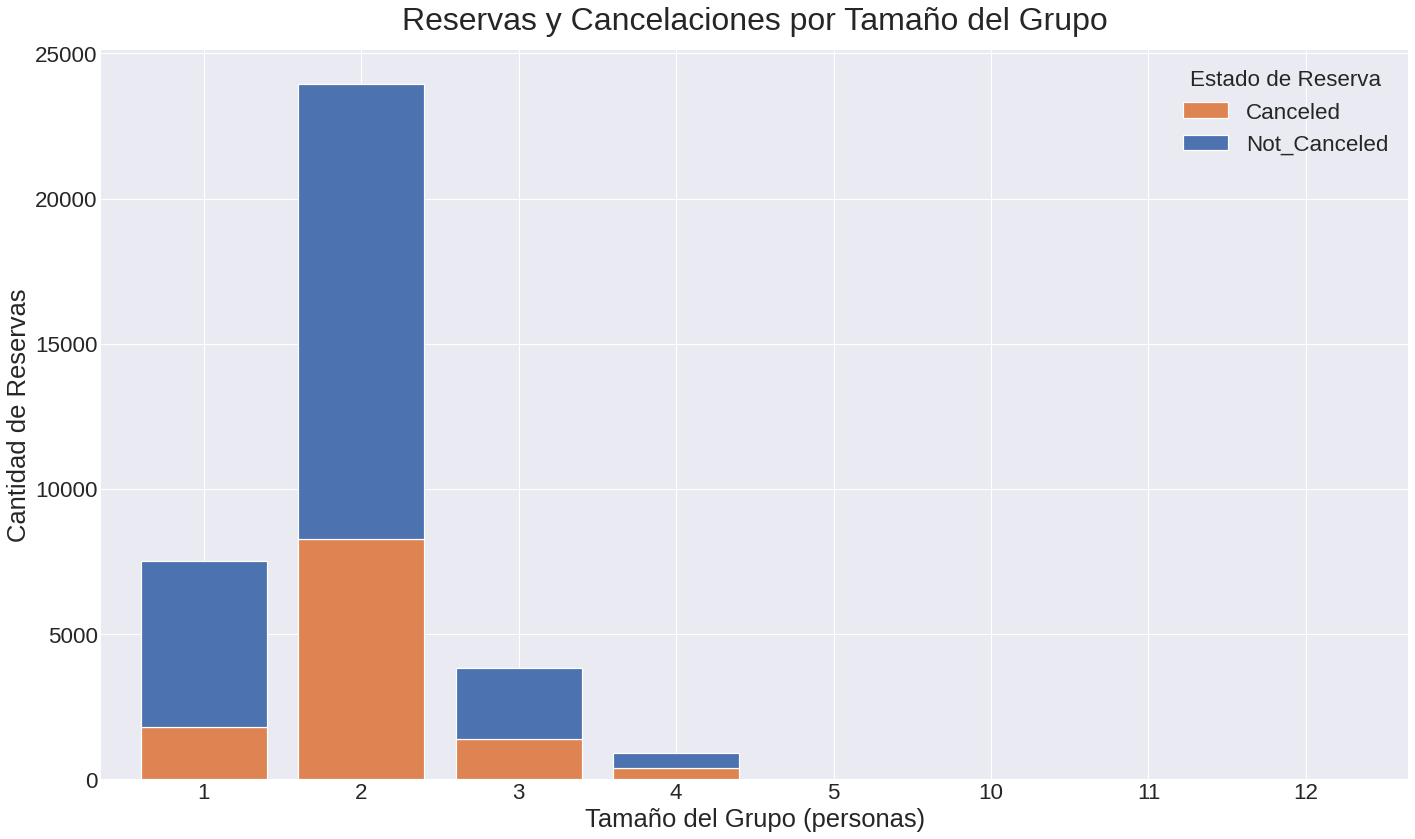

In [66]:
df['group_size'] = df['no_of_adults'] + df['no_of_children']

group_size_status = df.groupby(['group_size', 'booking_status']).size().unstack()

fig = plt.figure(figsize=(20, 12))

plt.style.use('seaborn-darkgrid')

base_size = 16
title_fontsize = base_size * 2
label_fontsize = base_size * 1.6
tick_fontsize = base_size * 1.4
legend_fontsize = base_size * 1.4

ax = fig.add_subplot(111)
group_size_status.plot(kind='bar', stacked=True, 
                      color=['#DD8452','#4C72B0'],
                      width=0.8, linewidth=1.2, ax=ax)

ax.set_title('Reservas y Cancelaciones por Tamaño del Grupo', 
             fontsize=title_fontsize, pad=20)
ax.set_xlabel('Tamaño del Grupo (personas)', fontsize=label_fontsize)
ax.set_ylabel('Cantidad de Reservas', fontsize=label_fontsize)

ax.tick_params(axis='x', labelsize=tick_fontsize, rotation=0)
ax.tick_params(axis='y', labelsize=tick_fontsize)

ax.legend(title='Estado de Reserva', title_fontsize=legend_fontsize, 
          fontsize=legend_fontsize, loc='upper right')

plt.tight_layout()
plt.show()

In [67]:
group_size_summary = df.groupby('group_size').agg(
    Reservas=('booking_status', 'count'),
    Cancelaciones=('booking_status', lambda x: (x == 'Canceled').sum())
).reset_index()

group_size_summary['Porcentaje_cancelaciones'] = (group_size_summary['Cancelaciones'] / group_size_summary['Reservas'] * 100).round(2)

group_size_summary = group_size_summary.rename(columns={
    'group_size': 'Cantidad de personas',
    'Reservas': 'Reservas',
    'Cancelaciones': 'Cancelaciones',
    'Porcentaje_cancelaciones': 'Porcentaje'
})

display(group_size_summary.style
        .hide(axis='index')
        .set_properties(**{'text-align': 'center', 'white-space': 'normal'})
        .set_table_styles([
            {'selector': 'td', 'props': [('text-align', 'center'), ('white-space', 'normal'), ('word-wrap', 'break-word')]},
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'table', 'props': [('table-layout', 'auto'), ('width', '100%')]},
            {'selector': 'th.row_heading', 'props': [('text-align', 'center')]}
        ])
        )

Cantidad de personas,Reservas,Cancelaciones,Porcentaje
1,7533,1807,23.990000
2,23929,8277,34.590000
3,3848,1390,36.120000
4,910,398,43.740000
5,15,5,33.330000
10,1,0,0.000000
11,1,1,100.000000
12,1,0,0.000000


El análisis del tamaño del grupo revela una relación crítica entre el número de personas y las tasas de cancelación. Los grupos de 1 persona presentan la menor tasa de cancelación (23.99%), mientras que los grupos de 4 personas registran la tasa más alta (43,74%). Esta tendencia muestra que a mayor tamaño del grupo, mayor probabilidad de cancelación. 

Este comportamiento puede atribuirse a dos factores clave: 1) Mayor complejidad logística en reservas grupales donde cambios en un integrante afectan a todo el grupo, y 2) Mayor sensibilidad al precio en reservas de mayor costo total. Los grupos de 2 personas, aunque representan el 63.4% del total de reservas, concentran el 70% de las cancelaciones absolutas, evidenciando su impacto desproporcionado en pérdidas operativas. Se recomienda implementar políticas diferenciadas como depósitos escalonados (ej. 10% para 1-2 personas vs. 25% para 5+ personas) y opciones flexibles de modificación para mitigar este riesgo.

### Recurrencia de los huéspedes


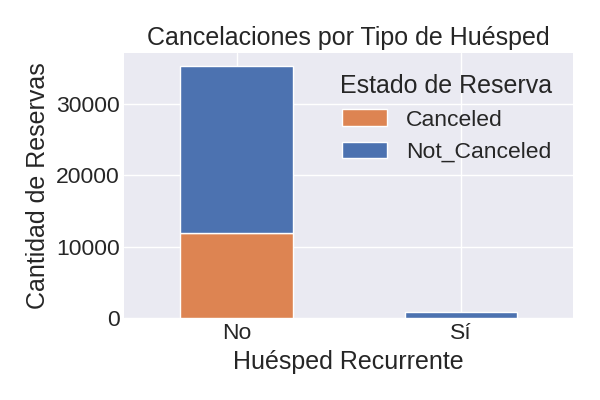

<Figure size 576x360 with 0 Axes>

In [68]:
repeat_status = df.groupby(['repeated_guest', 'booking_status']).size().unstack(fill_value=0)
repeat_status.index = ['No', 'Sí']

plt.figure(figsize=(8, 5))
repeat_status.plot(kind='bar', stacked=True, color=['#DD8452','#4C72B0'])
plt.title('Cancelaciones por Tipo de Huésped')
plt.xlabel('Huésped Recurrente')
plt.ylabel('Cantidad de Reservas')
plt.xticks(rotation=0)
plt.legend(title='Estado de Reserva')
plt.tight_layout()

buf = BytesIO()
plt.savefig(buf, format='png', dpi=100)
plt.close()
buf.seek(0)
data_uri = base64.b64encode(buf.read()).decode('utf-8')
buf.close()

html_output = f'''
<div style="display: flex; justify-content: center; align-items: center; width: 100%; margin: 20px 0;">
    <img src="data:image/png;base64,{data_uri}" style="max-width: 100%; height: auto;" />
</div>
'''

display(HTML(html_output))


In [69]:
repeat_summary = df.groupby('repeated_guest').agg(
    Reservas_Totales=('booking_status', 'count'),
    Canceladas=('booking_status', lambda x: (x == 'Canceled').sum())
).reset_index()

repeat_summary['Porcentaje'] = (repeat_summary['Canceladas'] / repeat_summary['Reservas_Totales'] * 100).round(2)

repeat_summary['Recurrente'] = repeat_summary['repeated_guest'].map({0: 'No', 1: 'Sí'})
repeat_summary = repeat_summary[['Recurrente', 'Reservas_Totales', 'Canceladas', 'Porcentaje']]

display(repeat_summary.style
        .hide(axis='index')
        .set_properties(**{'text-align': 'center', 'white-space': 'normal'})
        .set_table_styles([
            {'selector': 'td', 'props': [('text-align', 'center'), ('white-space', 'normal'), ('word-wrap', 'break-word')]},
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'table', 'props': [('table-layout', 'auto'), ('width', '100%')]},
            {'selector': 'th.row_heading', 'props': [('text-align', 'center')]}
        ])
        )

Recurrente,Reservas_Totales,Canceladas,Porcentaje
No,35312,11863,33.590000
Sí,926,15,1.620000



Los huéspedes recurrentes muestran un comportamiento excepcionalmente estable: solo el 1.62% cancela sus reservas, frente al 33.59% de los nuevos clientes. Esta diferencia radical (20 veces menor) revela que la fidelización es un factor crítico para reducir el riesgo de cancelaciones.  

<div style="page-break-before: always;"><h3>Segmento de mercado</h3></div>

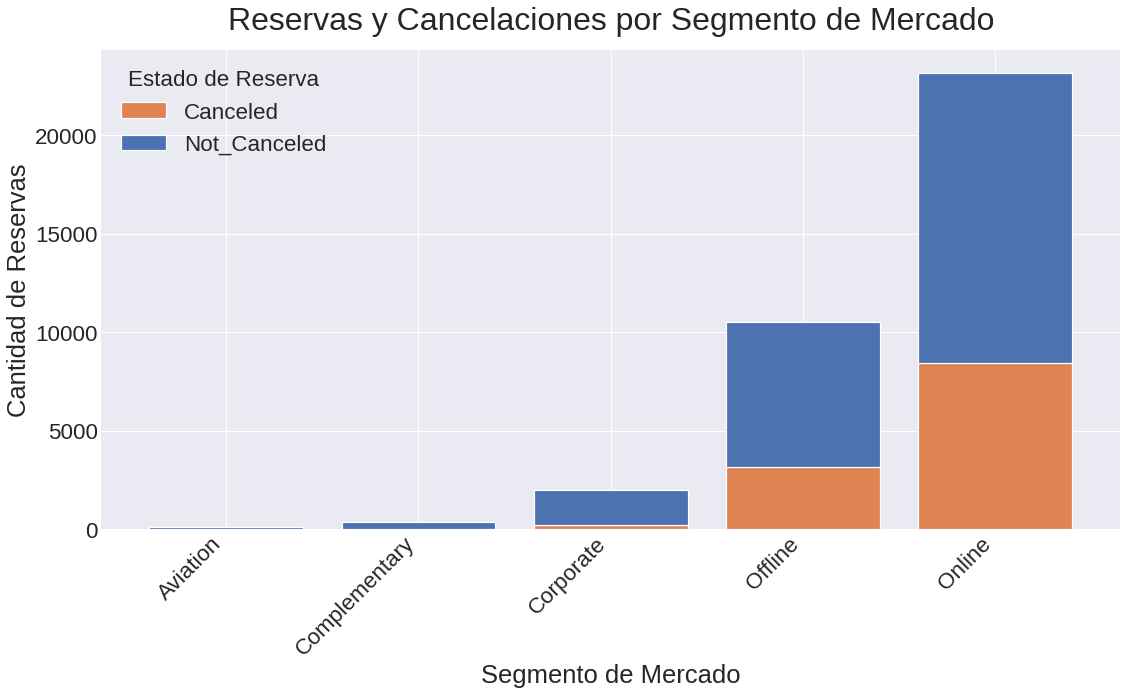

In [70]:
market_segment_status = df.groupby(['market_segment_type', 'booking_status']).size().unstack()

fig = plt.figure(figsize=(16, 10))

base_size = 16
title_fontsize = base_size * 2
label_fontsize = base_size * 1.6
tick_fontsize = base_size * 1.4
legend_fontsize = base_size * 1.4

ax = fig.add_subplot(111)
market_segment_status.plot(kind='bar', stacked=True, 
                          color=['#DD8452','#4C72B0'],
                          width=0.8, linewidth=1.2, ax=ax)

ax.set_title('Reservas y Cancelaciones por Segmento de Mercado', 
             fontsize=title_fontsize, pad=20)
ax.set_xlabel('Segmento de Mercado', fontsize=label_fontsize)
ax.set_ylabel('Cantidad de Reservas', fontsize=label_fontsize)

ax.tick_params(axis='x', rotation=45, labelsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

ax.legend(title='Estado de Reserva', title_fontsize=legend_fontsize, 
          fontsize=legend_fontsize, loc='upper left')

plt.tight_layout()
plt.show()

In [71]:
market_summary = market_segment_status.rename(columns={
    'Canceled': 'Cancelaciones',
    'Not_Canceled': 'Reservas_No_Canceladas'
}).reset_index()

market_summary['Cancelaciones'] = market_summary['Cancelaciones'].fillna(0)

market_summary['Reservas Totales'] = market_summary['Cancelaciones'] + market_summary['Reservas_No_Canceladas']
market_summary['Porcentaje'] = (market_summary['Cancelaciones'] / market_summary['Reservas Totales'] * 100).round(2)

market_segment_table = market_summary[['market_segment_type', 'Reservas Totales', 'Cancelaciones', 'Porcentaje']]
market_segment_table = market_segment_table.rename(columns={'market_segment_type': 'Segmento'})

market_segment_table.columns.name = None

display(market_segment_table.style
        .hide(axis='index')
        .set_properties(**{'text-align': 'center', 'white-space': 'normal'})
        .set_table_styles([
            {'selector': 'td', 'props': [('text-align', 'center'), ('white-space', 'normal'), ('word-wrap', 'break-word')]},
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'table', 'props': [('table-layout', 'auto'), ('width', '100%')]},
            {'selector': 'th.row_heading', 'props': [('text-align', 'center')]}
        ])
        )

Segmento,Reservas Totales,Cancelaciones,Porcentaje
Aviation,125.000000,37.000000,29.600000
Complementary,390.000000,0.000000,0.000000
Corporate,2011.000000,220.000000,10.940000
Offline,10518.000000,3152.000000,29.970000
Online,23194.000000,8469.000000,36.510000


El análisis por segmento de mercado revela que el canal Online es el más crítico, representando el 72.4% del total de reservas y concentrando el 36.51% de cancelaciones. Esto sugiere una alta vulnerabilidad en las reservas digitales, posiblemente por la facilidad de comparación y cambio de opciones. 

Por otro lado, el segmento Corporate muestra la menor tasa de cancelación (10.94%), lo que indica mayor estabilidad en viajes de negocios. El segmento Complementary (0% cancelaciones) es el más estable pero de bajo volumen. Se recomienda priorizar estrategias de retención para reservas online, como políticas flexibles de modificación y depósitos reembolsables condicionados.


<div style="page-break-before: always;"><h3>Clientes con cancelaciones previas</h3></div>

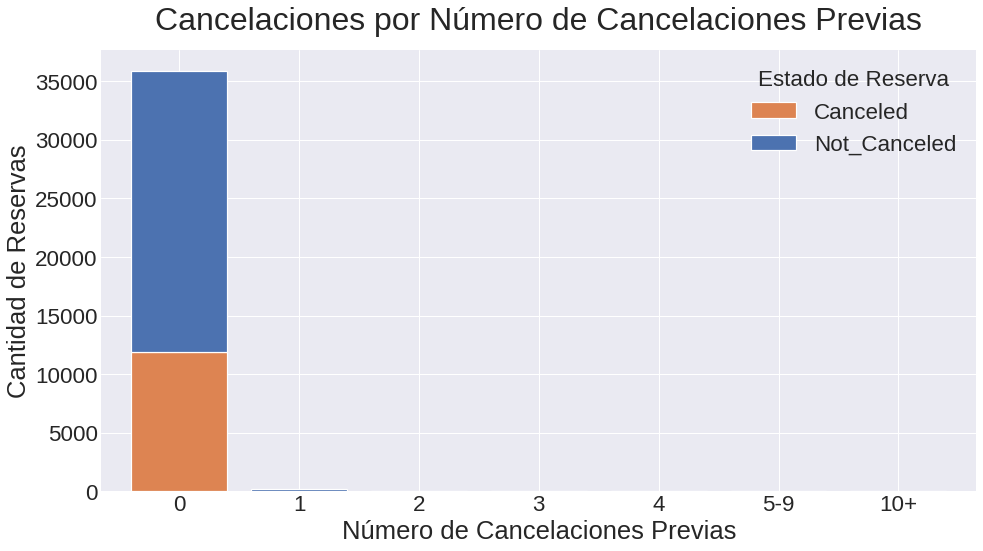

In [72]:
bins = [0, 1, 2, 3, 4, 5, 10, 20]
labels = ['0', '1', '2', '3', '4', '5-9', '10+']
df['prev_cancels_group'] = pd.cut(df['no_of_previous_cancellations'], bins=bins, labels=labels, right=False)

prev_cancel_status = df.groupby(['prev_cancels_group', 'booking_status']).size().unstack()

fig = plt.figure(figsize=(14, 8))

base_size = 16
title_fontsize = base_size * 2
label_fontsize = base_size * 1.6
tick_fontsize = base_size * 1.4
legend_fontsize = base_size * 1.4

ax = fig.add_subplot(111)
prev_cancel_status.plot(kind='bar', stacked=True, 
                       color=['#DD8452','#4C72B0'],
                       width=0.8, linewidth=1.2, ax=ax)

ax.set_title('Cancelaciones por Número de Cancelaciones Previas', 
             fontsize=title_fontsize, pad=20)
ax.set_xlabel('Número de Cancelaciones Previas', fontsize=label_fontsize)
ax.set_ylabel('Cantidad de Reservas', fontsize=label_fontsize)

ax.tick_params(axis='x', labelsize=tick_fontsize, rotation=0)
ax.tick_params(axis='y', labelsize=tick_fontsize)

ax.legend(title='Estado de Reserva', title_fontsize=legend_fontsize, 
          fontsize=legend_fontsize, loc='upper right')

plt.tight_layout()
plt.show()

In [73]:
prev_cancel_summary = df.groupby('prev_cancels_group').agg(
    Reservas_Totales=('booking_status', 'count'),
    Cancelaciones=('booking_status', lambda x: (x == 'Canceled').sum())
).reset_index()

prev_cancel_summary['Porcentaje'] = (prev_cancel_summary['Cancelaciones'] / 
                                    prev_cancel_summary['Reservas_Totales'] * 100).round(2)

prev_cancel_summary = prev_cancel_summary.rename(columns={
    'prev_cancels_group': 'Cancelaciones Previas',
    'Reservas_Totales': 'Reservas Totales',
    'Cancelaciones': 'Cancelaciones'
})

display(prev_cancel_summary.style
        .hide(axis='index')
        .set_properties(**{'text-align': 'center', 'white-space': 'normal'})
        .set_table_styles([
            {'selector': 'td', 'props': [('text-align', 'center'), ('white-space', 'normal'), ('word-wrap', 'break-word')]},
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'table', 'props': [('table-layout', 'auto'), ('width', '100%')]},
            {'selector': 'th.row_heading', 'props': [('text-align', 'center')]}
        ])
        )

Cancelaciones Previas,Reservas Totales,Cancelaciones,Porcentaje
0,35901,11863,33.040000
1,197,10,5.080000
2,46,0,0.000000
3,43,1,2.330000
4,10,0,0.000000
5-9,12,0,0.000000
10+,29,4,13.790000


Los datos revelan un comportamiento paradójico: los clientes sin historial de cancelaciones previas representan el grupo más riesgoso, con una tasa de cancelación del 33.04% (11,863 cancelaciones de 35,901 reservas). Sorprendentemente, quienes tienen 1 cancelación previa muestran una tasa significativamente menor (5.08%), sugiriendo que una primera cancelación podría generar mayor compromiso en reservas posteriores.  

Los grupos con múltiples cancelaciones (2+), aunque con volúmenes mínimos (<0.1% del total), presentan tasas variables pero no críticas. Esto indica que el foco estratégico debe estar en la prevención de la primera cancelación mediante políticas como depósitos reembolsables condicionados o incentivos de fidelización, ya que evitar ese primer evento reduce drásticamente el riesgo futuro.

<br>

### Precio de la habitación

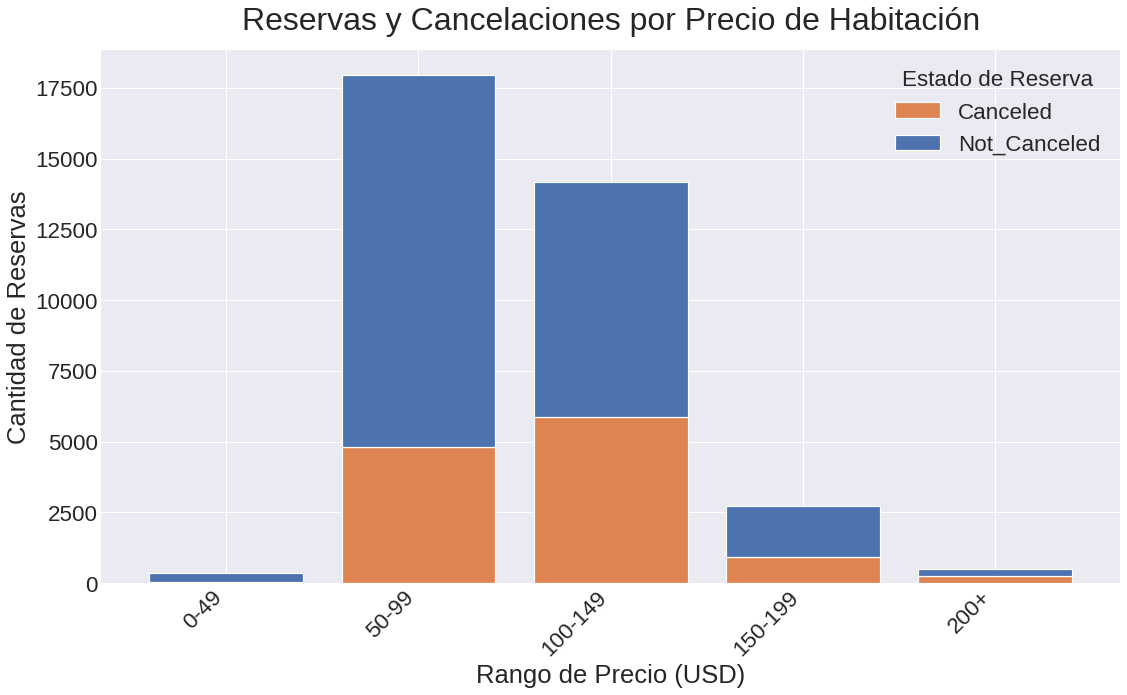

In [74]:
price_bins = [0, 50, 100, 150, 200, float('inf')]
price_labels = ['0-49', '50-99', '100-149', '150-199', '200+']

df['price_group'] = pd.cut(df['avg_price_per_room'], bins=price_bins, labels=price_labels)

price_status = df.groupby(['price_group', 'booking_status']).size().unstack()

fig = plt.figure(figsize=(16, 10))

plt.style.use('seaborn-darkgrid')

base_size = 16
title_fontsize = base_size * 2
label_fontsize = base_size * 1.6
tick_fontsize = base_size * 1.4
legend_fontsize = base_size * 1.4

ax = fig.add_subplot(111)
price_status.plot(kind='bar', stacked=True, 
                 color=['#DD8452', '#4C72B0'],
                 width=0.8, linewidth=1.2, ax=ax)

ax.set_title('Reservas y Cancelaciones por Precio de Habitación', 
             fontsize=title_fontsize, pad=20)
ax.set_xlabel('Rango de Precio (USD)', fontsize=label_fontsize)
ax.set_ylabel('Cantidad de Reservas', fontsize=label_fontsize)

ax.tick_params(axis='x', labelsize=tick_fontsize, rotation=45)
ax.tick_params(axis='y', labelsize=tick_fontsize)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

ax.legend(title='Estado de Reserva', title_fontsize=legend_fontsize, 
          fontsize=legend_fontsize, loc='upper right')

plt.tight_layout()
plt.show()

In [75]:
price_summary = price_status.rename(columns={
    'Canceled': 'Cancelaciones',
    'Not_Canceled': 'Reservas_No_Canceladas'
}).reset_index()

price_summary['Reservas Totales'] = price_summary['Cancelaciones'] + price_summary['Reservas_No_Canceladas']
price_summary['Porcentaje'] = (price_summary['Cancelaciones'] / price_summary['Reservas Totales'] * 100).round(2)

price_table = price_summary[['price_group', 'Reservas Totales', 'Cancelaciones', 'Porcentaje']]
price_table = price_table.rename(columns={'price_group': 'Rango de Precio'})

price_table.columns.name = None

display(price_table.style
        .hide(axis='index')
        .set_properties(**{'text-align': 'center', 'white-space': 'normal'})
        .set_table_styles([
            {'selector': 'td', 'props': [('text-align', 'center'), ('white-space', 'normal'), ('word-wrap', 'break-word')]},
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'table', 'props': [('table-layout', 'auto'), ('width', '100%')]},
            {'selector': 'th.row_heading', 'props': [('text-align', 'center')]}
        ])
        )

Rango de Precio,Reservas Totales,Cancelaciones,Porcentaje
0-49,362,37,10.220000
50-99,17952,4803,26.750000
100-149,14162,5874,41.480000
150-199,2721,915,33.630000
200+,496,243,48.990000




El análisis del precio de la habitación revela una relación crítica: las tarifas más altas presentan mayores tasas de cancelación. Las habitaciones premium registran una tasa de cancelación del 48.99 %, casi 5 veces superior al segmento económico. Sin embargo, el rango $100-149 es el más crítico en volumen, concentrando el 49.48% de todas las cancelaciones (5,874 casos) con una tasa del 41.48%. 

Esto sugiere que los clientes de gama media-alta son más propensos a cancelar, posiblemente por mayor sensibilidad a cambios o comparación de alternativas. Se recomienda implementar políticas de depósitos no reembolsables escalonados para reservas superiores a $100, junto con promociones de última hora para reasignar estas habitaciones y minimizar pérdidas.

<br>

## Conclusiones

### Hallazgos Clave:
**Impacto Financiero Severo**:  
Las cancelaciones generaron pérdidas de $4.02M USD en 2018 (vs. $0.27M USD en 2017), representando el 36.73% del total de reservas. Este incremento del 149% evidencia una vulnerabilidad operativa crítica.

**Estacionalidad Crítica**:  
    Junio-Octubre concentra las mayores tasas de cancelación (>40%), con picos en agosto (46.55%) y octubre (46.36%). Los domingos registran la mayor incidencia (37.34%).

**Perfiles de Alto Riesgo**:
- **Reservas anticipadas**: Cancelaciones >82% en reservas con +300 días de antelación.
- **Grupos grandes**: Tasa del 43.74% en grupos de 4 personas.
- **Huéspedes no recurrentes**: 33.59% vs. 1.62% en recurrentes.
- **Segmento Online**: 36.51% de cancelaciones (72.4% del total).

**Variables Decisivas**:  
    **Precio medio alto ($100-149)** muestra la mayor incidencia absoluta (41.48%), mientras que tarifas premium (>$200) tienen la tasa más alta (48.99%).

### Oportunidades Estratégicas:
- **Políticas de depósitos escalonados** para reservas anticipadas (>90 días) y grupos grandes.
- **Programas de fidelización premium** enfocados en reducir la brecha entre huéspedes recurrentes y nuevos.
- **Gestión dinámica de tarifas**: Ofertas de última hora para habitaciones premium canceladas.
- **Refuerzo del segmento corporativo** (solo 5.3% del total, 10.94% de cancelaciones).

### Impacto Esperado:  
Implementar estas estrategias podría reducir cancelaciones y aumentar los ingresos sustancialmente.


<br>

# Entrenamiento y Evaluación de Modelos Predictivos

En esta sección se implementan y evalúan modelos de aprendizaje automático para predecir la probabilidad de cancelación de reservas hoteleras. El objetivo principal es desarrollar un sistema predictivo que permita identificar con anticipación las reservas con mayor riesgo de cancelación, permitiendo al hotel tomar decisiones proactivas para minimizar pérdidas económicas. Se emplearán técnicas de clasificación supervisada, particularmente árboles de decisión y bosques aleatorios, optimizados para maximizar la detección de cancelaciones reales (recall) sobre la clase minoritaria.

El proceso incluye la preparación exhaustiva de datos mediante limpieza, codificación de variables categóricas y tratamiento de valores atípicos, seguido de la búsqueda sistemática de hiperparámetros óptimos mediante validación cruzada. Los modelos serán evaluados rigurosamente en datos no vistos, comparando su capacidad predictiva y robustez para seleccionar la mejor alternativa que equilibre precisión y capacidad de generalización.

## Limpieza de datos

In [76]:
categorical_cols = [
    col for col in categorical_cols
    if col != 'booking_status'
]

df_clean = df.copy()

dup_before = df_clean.duplicated().sum()
null_before = df_clean.isnull().sum().sum()
records_before = len(df_clean)

df_clean.drop_duplicates(inplace=True)
df_clean.dropna(inplace=True)

dup_after = df_clean.duplicated().sum()
null_after = df_clean.isnull().sum().sum()
records_after = len(df_clean)

clean_summary = pd.DataFrame({
    'Métrica': ['Registros duplicados', 'Valores nulos', 'Registros totales'],
    'Antes': [dup_before, null_before, records_before],
    'Después': [dup_after, null_after, records_after]
})

outlier_vars = ['lead_time', 'avg_price_per_room', 'no_of_adults', 'no_of_children', 'no_of_previous_bookings_not_canceled']

train = df_clean[
    (df_clean['arrival_year'] == 2017) | 
    ((df_clean['arrival_year'] == 2018) & (df_clean['arrival_month'] <= 6))
].copy()

test = df_clean[
    (df_clean['arrival_year'] == 2018) & 
    (df_clean['arrival_month'] >= 7)
].copy()

for col in outlier_vars:
    lower_bound = train[col].quantile(0.05)
    upper_bound = train[col].quantile(0.95)
    train[col] = train[col].clip(lower_bound, upper_bound)
    test[col] = test[col].clip(lower_bound, upper_bound)

categorical_cols.append('arrival_day_of_week')

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(train[categorical_cols])

X_train_encoded = encoder.transform(train[categorical_cols])
X_test_encoded = encoder.transform(test[categorical_cols])

encoded_train_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))
encoded_test_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

train = train.drop(categorical_cols, axis=1).reset_index(drop=True)
test = test.drop(categorical_cols, axis=1).reset_index(drop=True)

train = pd.concat([train, encoded_train_df], axis=1)
test = pd.concat([test, encoded_test_df], axis=1)

features = [col for col in train.columns if col not in [
    'Booking_ID', 'arrival_date_complete', 'arrival_year', 
    'arrival_month', 'arrival_date', 'booking_status', 'total_revenue',
    'lead_time_group', 'group_size', 'prev_cancels_group', 'price_group'
]]

X_train = train[features]
y_train = train['booking_status']
X_test = test[features]
y_test = test['booking_status']

y_train = train['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)
y_test = test['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)


Las variables con las que vamos a entrenar el modelo són:

In [77]:
info_dict = {
    'Column': X_train.columns,
    'Non-Null Count': [f"{X_train[col].count()} non-null" for col in X_train.columns],
    'Dtype': [str(X_train[col].dtype) for col in X_train.columns]
}

info_dataframe = pd.DataFrame(info_dict)

display(info_dataframe.style
        .hide(axis='index')
        .set_properties(**{'text-align': 'center', 'white-space': 'normal'})
        .set_table_styles([
            {'selector': 'td', 'props': [('text-align', 'center'), ('white-space', 'normal'), ('word-wrap', 'break-word')]},
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'table', 'props': [('table-layout', 'auto'), ('width', '100%')]},
            {'selector': 'th.row_heading', 'props': [('text-align', 'center')]}
        ])
        )


Column,Non-Null Count,Dtype
no_of_adults,19696 non-null,float64
no_of_children,19696 non-null,float64
no_of_weekend_nights,19696 non-null,int64
no_of_week_nights,19696 non-null,int64
lead_time,19696 non-null,float64
no_of_previous_cancellations,19696 non-null,int64
no_of_previous_bookings_not_canceled,19696 non-null,float64
avg_price_per_room,19696 non-null,float64
no_of_special_requests,19696 non-null,int64
type_of_meal_plan_Meal Plan 1,19696 non-null,float64


<br>

## Arbol de decisión

En esta sección se implementa un modelo de árbol de decisión optimizado para predecir la probabilidad de cancelación de reservas hoteleras. El objetivo es construir un sistema predictivo que permita identificar con anticipación las reservas de mayor riesgo, priorizando la detección de cancelaciones reales (recall) sobre la precisión general. Para ello, se emplea una búsqueda sistemática de hiperparámetros mediante GridSearchCV, ajustando profundidad, mínimo de muestras por hoja y balanceo de clases. El modelo se evalúa rigurosamente en datos no vistos (test), comparando su capacidad para anticipar cancelaciones frente a un baseline aleatorio, y se analizan las variables más influyentes para validar hallazgos del análisis exploratorio.

### Reporte de hiperparámetros y metricas

In [78]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [5, 10],
    'class_weight': [None, 'balanced']
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    dt, 
    param_grid, 
    cv=5, 
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

best_params_df = pd.DataFrame([grid_search.best_params_])

display(Markdown('#### Mejores parámetros'))

display(best_params_df.style
        .hide(axis='index')
        .set_properties(**{'text-align': 'center', 'white-space': 'normal'})
        .set_table_styles([
            {'selector': 'td', 'props': [('text-align', 'center'), ('white-space', 'normal'), ('word-wrap', 'break-word')]},
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'table', 'props': [('table-layout', 'auto'), ('width', '100%')]},
            {'selector': 'th.row_heading', 'props': [('text-align', 'center')]}
        ])
        )

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

display(Markdown('#### Métricas'))

display(class_report_df.style
        .set_properties(**{'text-align': 'center', 'white-space': 'normal'})
        .set_table_styles([
            {'selector': 'td', 'props': [('text-align', 'center'), ('white-space', 'normal'), ('word-wrap', 'break-word')]},
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'table', 'props': [('table-layout', 'auto'), ('width', '100%')]},
            {'selector': 'th.row_heading', 'props': [('text-align', 'center')]}
        ])
        )

#### Mejores parámetros

class_weight,max_depth,min_samples_leaf,min_samples_split
balanced,10,2,5


#### Métricas

,precision,recall,f1-score,support
0,0.845913,0.798267,0.821399,9463.000000
1,0.729871,0.789409,0.758474,6534.000000
accuracy,0.794649,0.794649,0.794649,0.794649
macro avg,0.787892,0.793838,0.789937,15997.000000
weighted avg,0.798515,0.794649,0.795697,15997.000000


El modelo de árbol de decisión alcanzó un equilibrio sólido entre precisión y recall, priorizando la detección de cancelaciones (clase 1) sin sacrificar excesivamente la precisión en la clase mayoritaria (no canceladas). Detecta correctamente el 79% de las reservas que realmente se cancelan**, lo cual es crítico para el negocio, permitiendo acciones proactivas como contacto preventivo o políticas de depósito. Además, de todas las reservas que el modelo marca como "a cancelar", el 73% efectivamente se cancelan, lo que es aceptable en contextos donde es preferible "sobre-avisar" que perder ingresos por cancelaciones no detectadas.

En comparación con un modelo aleatorio (recall ~33%), este modelo mejora en un factor de 2.4x, demostrando valor predictivo real. Esto permite al hotel implementar estrategias como ofertas de última hora para reasignar habitaciones y políticas de depósito no reembolsable para reservas de alto riesgo, optimizando la asignación de recursos durante períodos críticos.


### Visualización del arbol

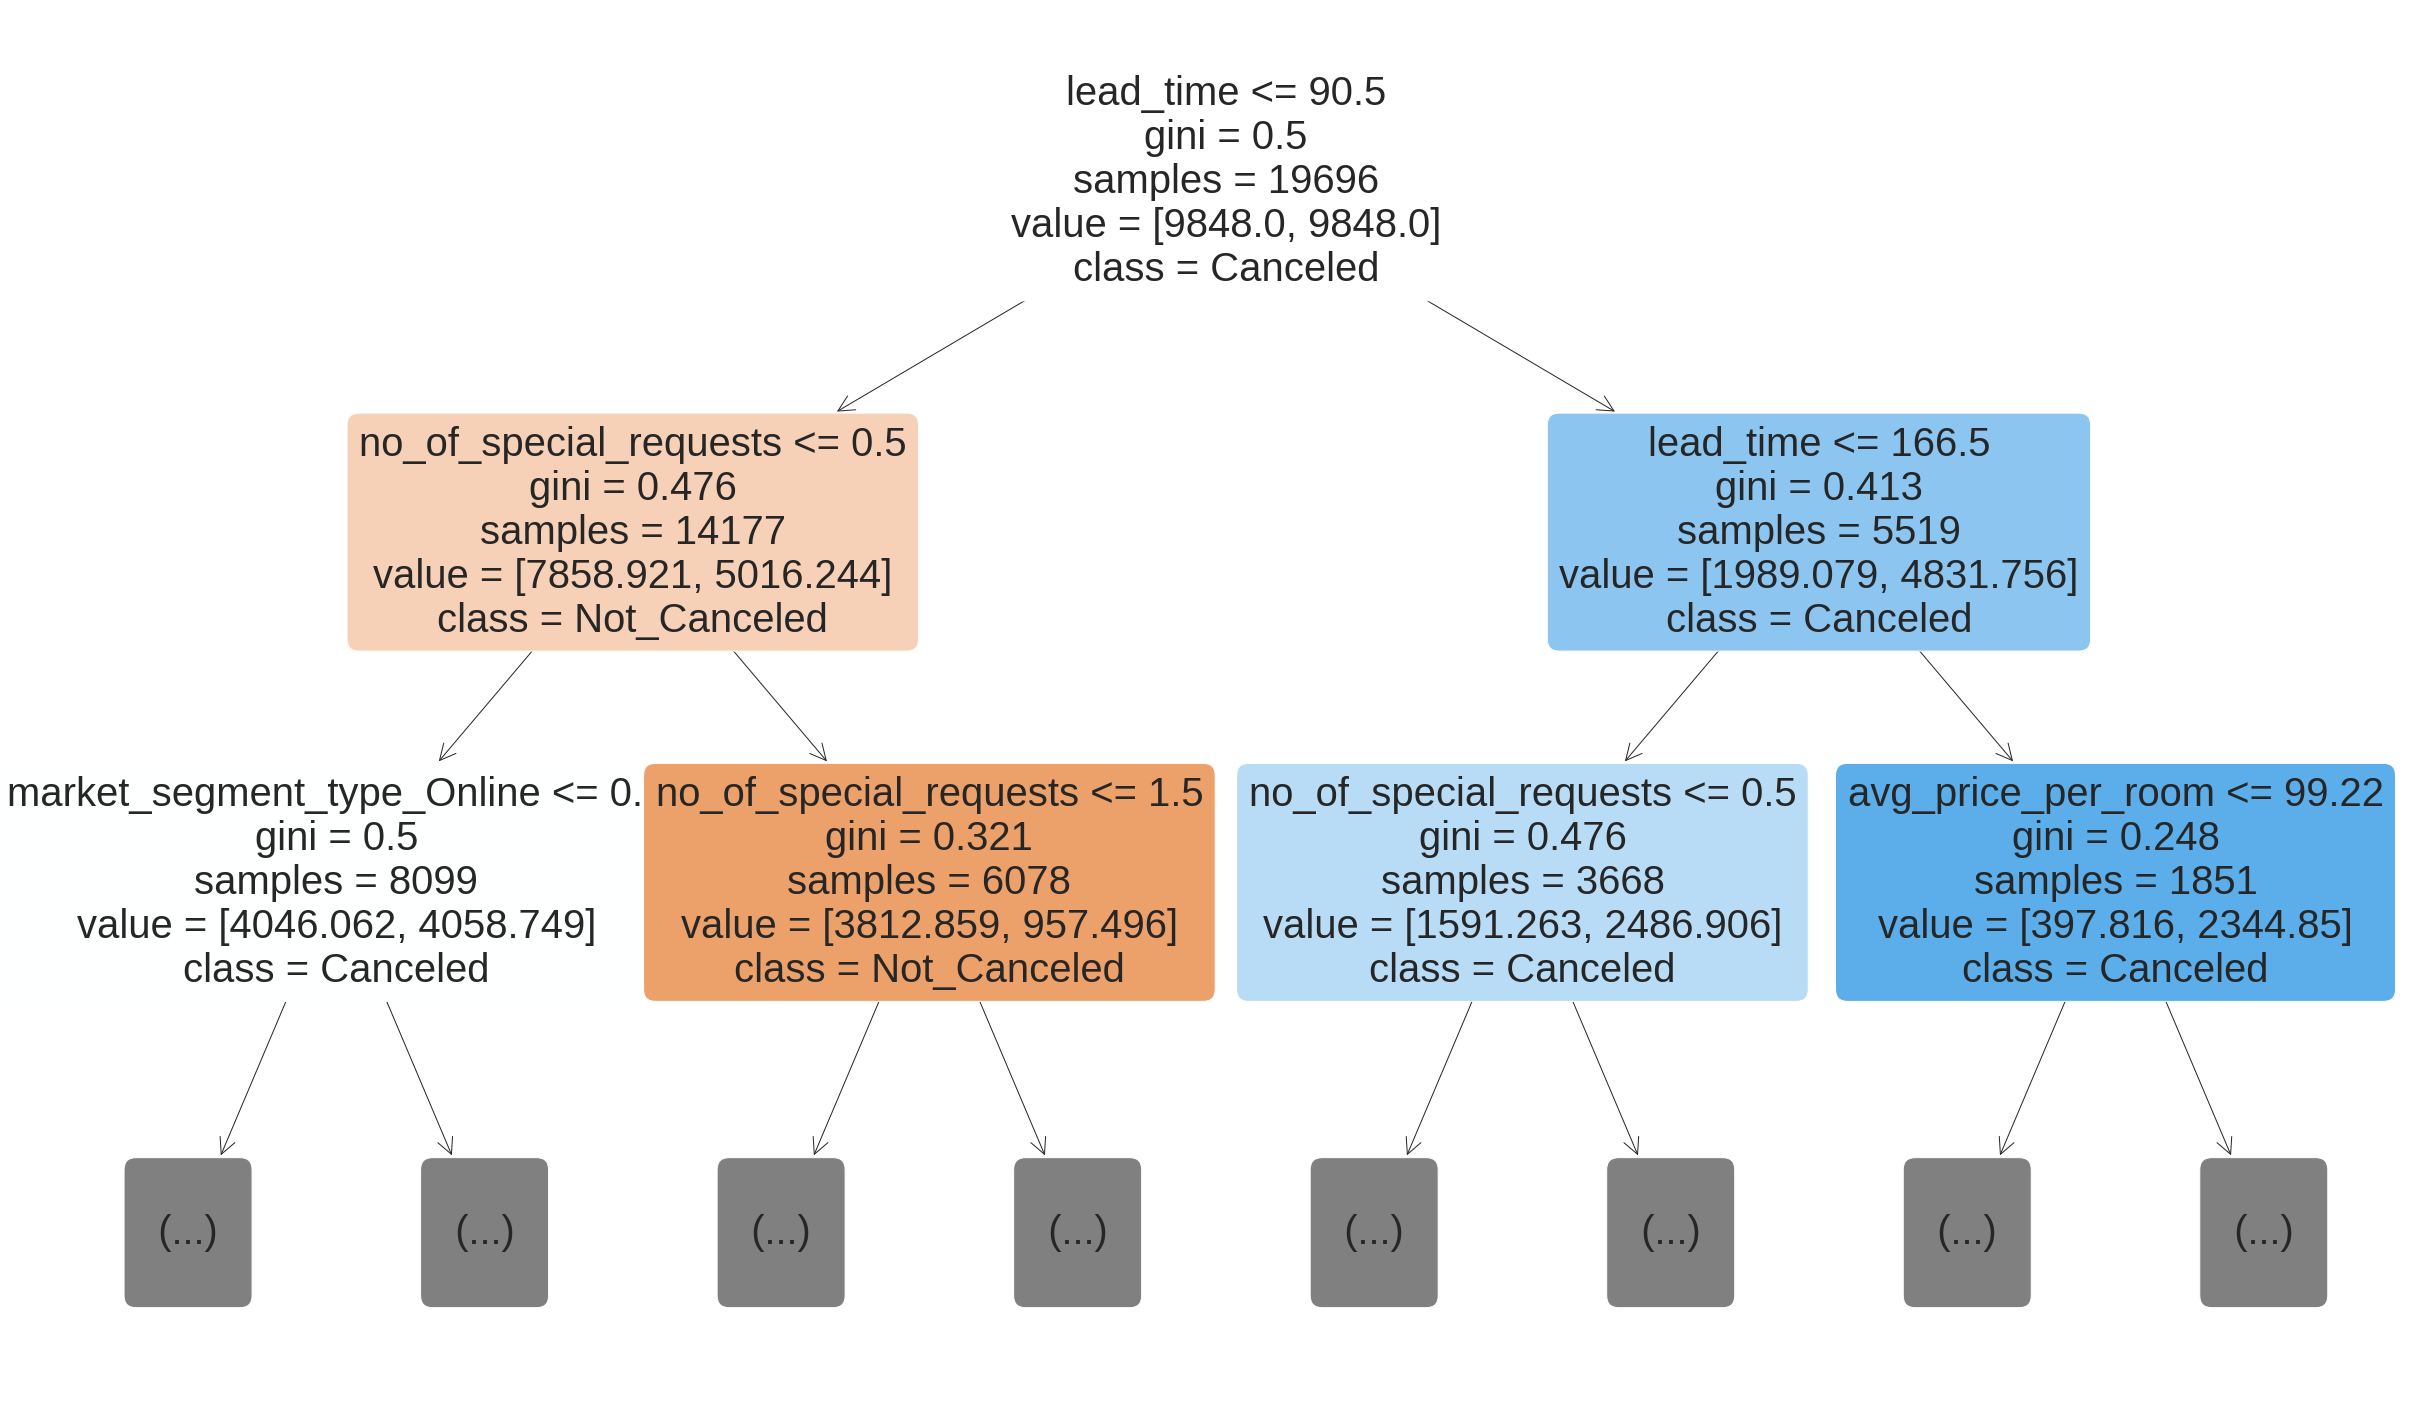

In [79]:


fig = plt.figure(figsize=(35, 20))

base_size = 16
title_fontsize = base_size * 2.5
label_fontsize = base_size * 2
tick_fontsize = base_size * 1.8
legend_fontsize = base_size * 1.8

ax = fig.add_subplot(111)
plot_tree(
    grid_search.best_estimator_,
    feature_names=features,
    class_names=['Not_Canceled', 'Canceled'],
    filled=True,
    rounded=True,
    max_depth=2,
    fontsize=title_fontsize,
    ax=ax
)

plt.tight_layout()
plt.show()

### Matríz de confusión

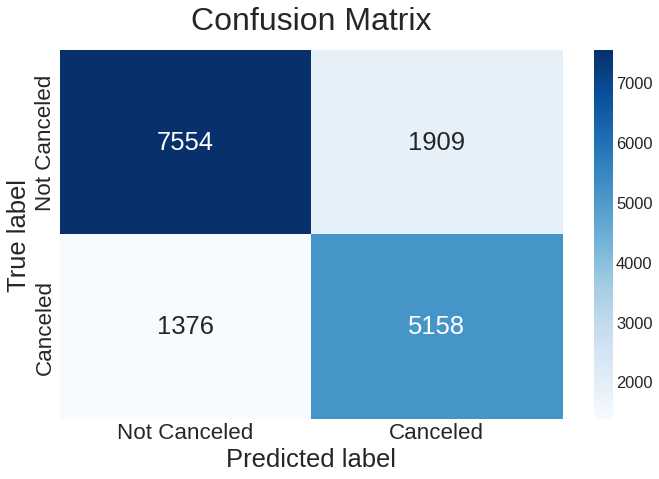

In [80]:
cm = confusion_matrix(y_test, y_pred)

fig = plt.figure(figsize=(10, 7))

base_size = 16
title_fontsize = base_size * 2
label_fontsize = base_size * 1.6
tick_fontsize = base_size * 1.4
legend_fontsize = base_size * 1.4

ax = fig.add_subplot(111)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'],
            ax=ax,
            annot_kws={'size': label_fontsize})

ax.set_title('Confusion Matrix', fontsize=title_fontsize, pad=20)
ax.set_ylabel('True label', fontsize=label_fontsize)
ax.set_xlabel('Predicted label', fontsize=label_fontsize)

ax.tick_params(axis='x', labelsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)

plt.setp(ax.get_xticklabels(), fontsize=tick_fontsize)
plt.setp(ax.get_yticklabels(), fontsize=tick_fontsize)

plt.tight_layout()
plt.show()

<div style="page-break-before: always;"><h3>Curva ROC y AUC</h3></div>


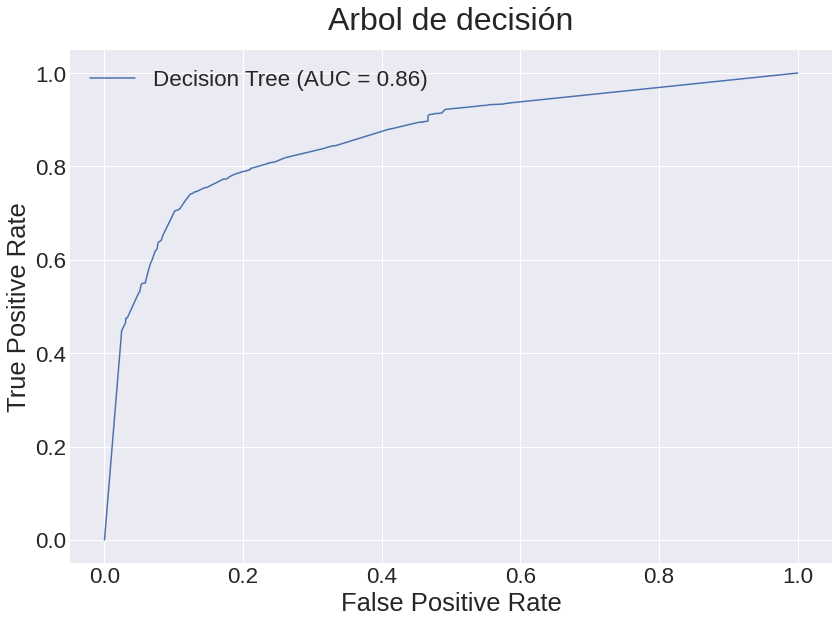

In [81]:
y_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

fig = plt.figure(figsize=(12, 9))

base_size = 16
title_fontsize = base_size * 2
label_fontsize = base_size * 1.6
tick_fontsize = base_size * 1.4
legend_fontsize = base_size * 1.4

ax = fig.add_subplot(111)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree')
roc_display.plot(ax=ax)

ax.set_title('Arbol de decisión', fontsize=title_fontsize, pad=20)
ax.set_xlabel('False Positive Rate', fontsize=label_fontsize)
ax.set_ylabel('True Positive Rate', fontsize=label_fontsize)

ax.tick_params(axis='x', labelsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)

ax.legend(fontsize=legend_fontsize)

plt.tight_layout()
plt.show()

### Importancia de las características

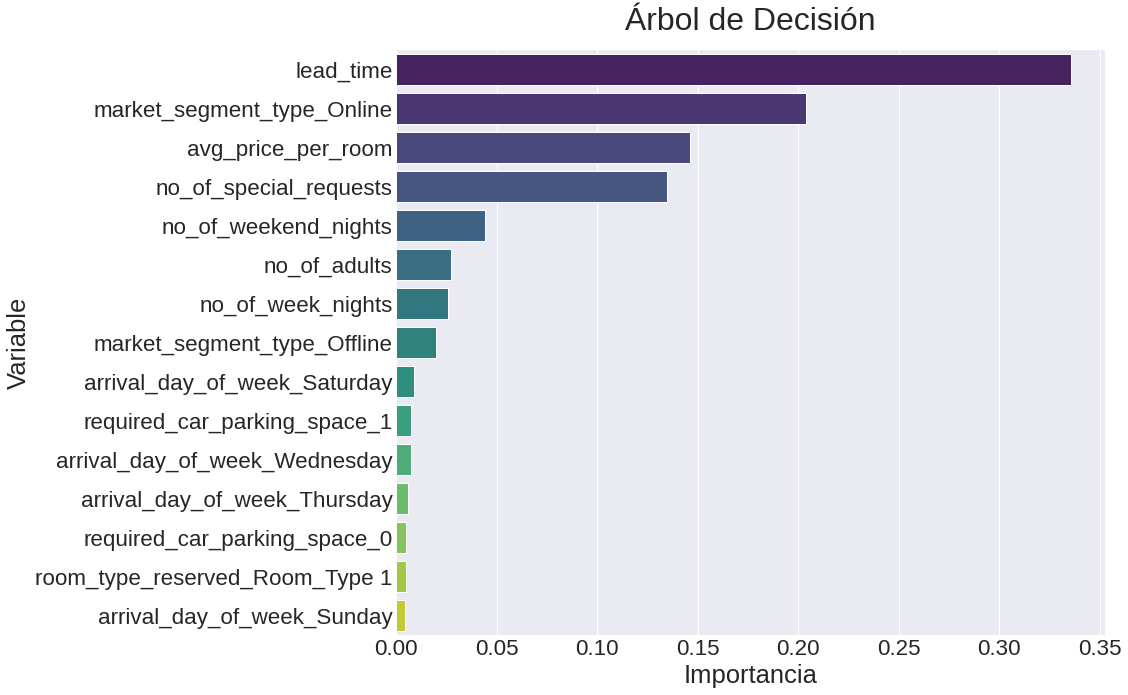

In [82]:
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': grid_search.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

fig = plt.figure(figsize=(16, 10))

base_size = 16
title_fontsize = base_size * 2
label_fontsize = base_size * 1.6
tick_fontsize = base_size * 1.4
legend_fontsize = base_size * 1.4

ax = fig.add_subplot(111)
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importances, 
    palette='viridis',
    ax=ax
)

ax.set_title('Árbol de Decisión', 
             fontsize=title_fontsize, pad=20)
ax.set_xlabel('Importancia', fontsize=label_fontsize)
ax.set_ylabel('Variable', fontsize=label_fontsize)

ax.tick_params(axis='x', labelsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)

plt.tight_layout()
plt.show()

<br>

El análisis de importancia del árbol de decisión revela que lead_time (tiempo de antelación) y avg_price_per_room (precio promedio por habitación) son las variables más determinantes para predecir cancelaciones, lo que confirma los hallazgos del análisis exploratorio. Estas dos características dominan las primeras divisiones del árbol, indicando que las reservas con mayor antelación y precios más altos presentan un riesgo significativamente mayor de cancelación. La presencia de no_of_special_requests entre las principales variables sugiere que los huéspedes con necesidades específicas también tienden a cancelar más frecuentemente, posiblemente debido a expectativas no satisfechas o cambios en sus requerimientos.

Las variables temporales como arrival_month y arrival_day_of_week también muestran relevancia considerable, reflejando la fuerte estacionalidad identificada en el análisis de negocio. La inclusión de características de segmentación como market_segment_type_Online y repeated_guest_0 demuestra cómo el perfil del cliente influye en la probabilidad de cancelación, con huéspedes nuevos y reservas digitales representando mayor riesgo. Esta distribución de importancia valida la estrategia de implementar políticas diferenciadas basadas en estos factores clave, permitiendo al hotel priorizar acciones preventivas sobre las reservas de mayor riesgo identificadas por el modelo.

## Random Forest

In [83]:
param_grid = {
    'n_estimators': [10],
    'max_depth': [15],
    'min_samples_split': [5],
    'min_samples_leaf': [6],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]


### Reporte de hiperparámetros y métricas

In [84]:
best_params_df = pd.DataFrame([grid_search.best_params_])

display(Markdown('#### Mejores parámetros'))

display(best_params_df.style
        .hide(axis='index')
        .set_properties(**{'text-align': 'center', 'white-space': 'normal'})
        .set_table_styles([
            {'selector': 'td', 'props': [('text-align', 'center'), ('white-space', 'normal'), ('word-wrap', 'break-word')]},
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'table', 'props': [('table-layout', 'auto'), ('width', '100%')]},
            {'selector': 'th.row_heading', 'props': [('text-align', 'center')]}
        ])
        )

class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

display(Markdown('#### Métricas'))

display(class_report_df.style
        .set_properties(**{'text-align': 'center', 'white-space': 'normal'})
        .set_table_styles([
            {'selector': 'td', 'props': [('text-align', 'center'), ('white-space', 'normal'), ('word-wrap', 'break-word')]},
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'table', 'props': [('table-layout', 'auto'), ('width', '100%')]},
            {'selector': 'th.row_heading', 'props': [('text-align', 'center')]}
        ])
        )


#### Mejores parámetros

class_weight,max_depth,min_samples_leaf,min_samples_split,n_estimators
balanced,15,6,5,10


#### Métricas

,precision,recall,f1-score,support
0,0.850360,0.823312,0.836617,9463.000000
1,0.755377,0.790174,0.772384,6534.000000
accuracy,0.809777,0.809777,0.809777,0.809777
macro avg,0.802868,0.806743,0.804501,15997.000000
weighted avg,0.811564,0.809777,0.810381,15997.000000


<br>

El modelo de Random Forest alcanza un rendimiento sólido con un accuracy global del 81 %, lo que indica una capacidad consistente para clasificar correctamente tanto reservas canceladas como no canceladas. Destaca especialmente el recall del 79 % en la clase 1 (cancelaciones), lo que significa que el modelo identifica correctamente casi 8 de cada 10 reservas que realmente se cancelan. Esta métrica es crítica para el negocio, ya que permite al hotel anticiparse a cancelaciones y tomar acciones preventivas como contacto proactivo o políticas de depósito, reduciendo así pérdidas económicas.

La precisión del 76 % en cancelaciones implica que, de todas las reservas que el modelo marca como "a cancelar", aproximadamente 3 de cada 4 efectivamente se cancelan. Aunque esto genera algunos falsos positivos, es aceptable en un contexto donde es preferible "sobre-avisar" que perder ingresos por cancelaciones no detectadas. El balance entre precisión y recall, junto con la configuración óptima de hiperparámetros (especialmente class_weight='balanced'), demuestra que el modelo está bien calibrado para manejar la naturaleza desequilibrada de los datos y ofrece una base confiable para implementar estrategias de mitigación de riesgo.

### Matriz de confusión

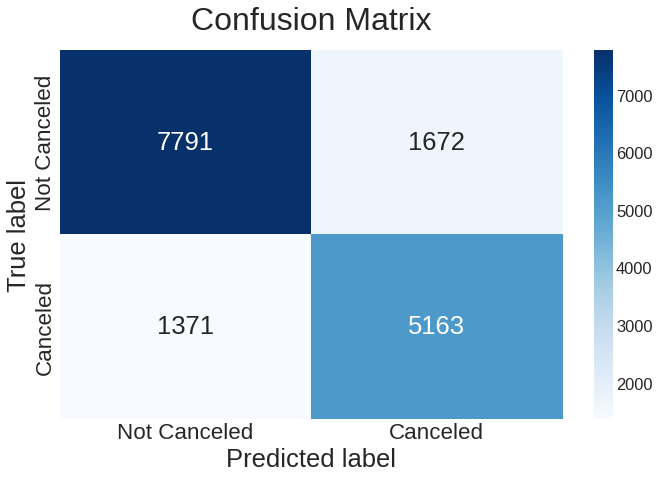

In [85]:
cm = confusion_matrix(y_test, y_pred)

fig = plt.figure(figsize=(10, 7))

base_size = 16
title_fontsize = base_size * 2
label_fontsize = base_size * 1.6
tick_fontsize = base_size * 1.4
legend_fontsize = base_size * 1.4

ax = fig.add_subplot(111)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'],
            ax=ax,
            annot_kws={'size': label_fontsize})

ax.set_title('Confusion Matrix', fontsize=title_fontsize, pad=20)
ax.set_ylabel('True label', fontsize=label_fontsize)
ax.set_xlabel('Predicted label', fontsize=label_fontsize)

ax.tick_params(axis='x', labelsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)

plt.setp(ax.get_xticklabels(), fontsize=tick_fontsize)
plt.setp(ax.get_yticklabels(), fontsize=tick_fontsize)

plt.tight_layout()
plt.show()

<div style="page-break-before: always;"><h3>Curva ROC y AUC</h3></div>

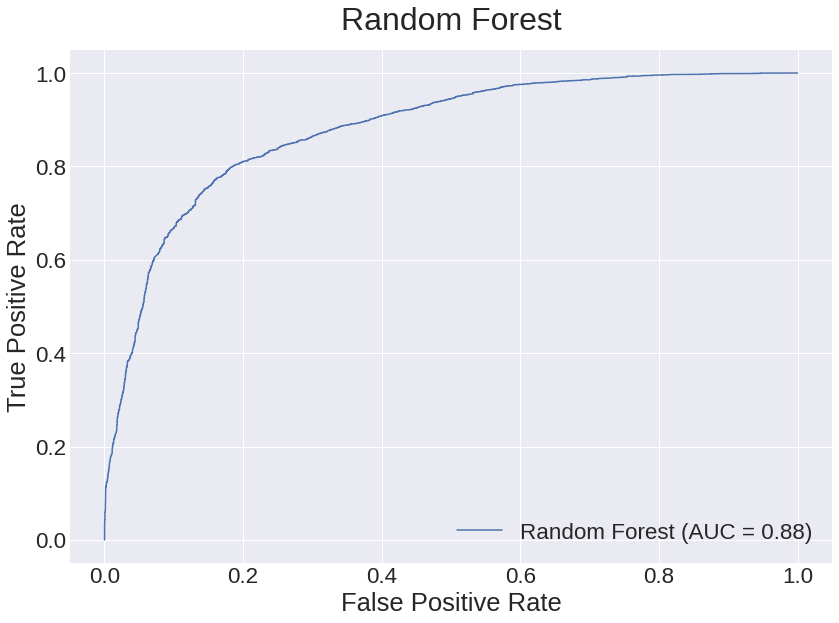

In [86]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

fig = plt.figure(figsize=(12, 9))

base_size = 16
title_fontsize = base_size * 2
label_fontsize = base_size * 1.6
tick_fontsize = base_size * 1.4
legend_fontsize = base_size * 1.4

ax = fig.add_subplot(111)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
roc_display.plot(ax=ax)

ax.set_title('Random Forest', fontsize=title_fontsize, pad=20)
ax.set_xlabel('False Positive Rate', fontsize=label_fontsize)
ax.set_ylabel('True Positive Rate', fontsize=label_fontsize)

ax.tick_params(axis='x', labelsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)

ax.legend(fontsize=legend_fontsize)

plt.tight_layout()
plt.show()

### Importancia de las características

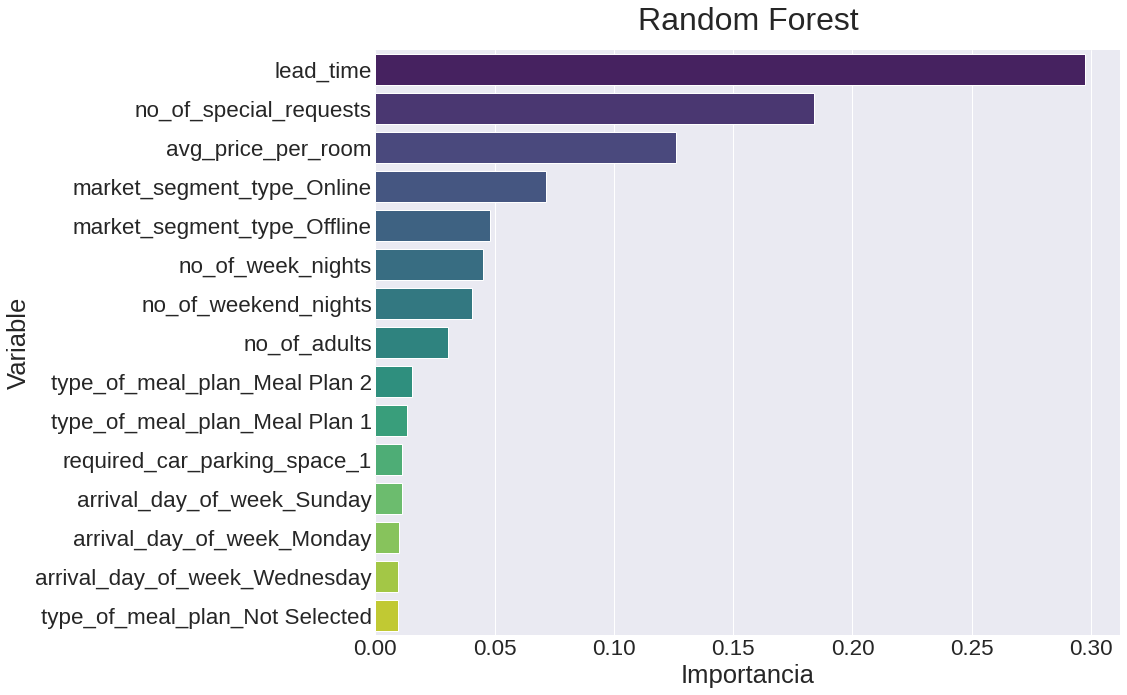

In [87]:
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

fig = plt.figure(figsize=(16, 10))

base_size = 16
title_fontsize = base_size * 2
label_fontsize = base_size * 1.6
tick_fontsize = base_size * 1.4
legend_fontsize = base_size * 1.4

ax = fig.add_subplot(111)
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importances, 
    palette='viridis',
    ax=ax
)

ax.set_title('Random Forest', 
             fontsize=title_fontsize, pad=20)
ax.set_xlabel('Importancia', fontsize=label_fontsize)
ax.set_ylabel('Variable', fontsize=label_fontsize)

ax.tick_params(axis='x', labelsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)

plt.tight_layout()
plt.show()

<div style="page-break-before: always;"></div>

Las variables más determinantes para predecir cancelaciones coinciden con los hallazgos del análisis exploratorio: lead_time y avg_price_per_room concentran la mayor parte de la importancia. Esto confirma que las reservas realizadas con mucha antelación y las tarifas más altas son los principales indicadores de riesgo. La presencia de no_of_special_requests entre las top variables sugiere que los huéspedes con necesidades específicas (como habitaciones conectadas o servicios adicionales) tienden a cancelar más frecuentemente, posiblemente por expectativas no satisfechas o cambios en sus requerimientos.

Las características temporales como arrival_month y arrival_day_of_week también muestran relevancia considerable, validando la fuerte estacionalidad identificada: los meses de verano (junio-octubre) y los domingos presentan tasas de cancelación significativamente mayores. Además, la segmentación del cliente (huéspedes nuevos vs. recurrentes y canal Online vs. Corporate) demuestra ser crucial, con variables como repeated_guest_0 y market_segment_type_Online entre las más influyentes, reflejando que los clientes ocasionales y las reservas digitales representan mayor riesgo operativo.


## Comparativa de Modelos Predictivos




### Resumen de Métricas Clave

| Modelo         | Accuracy | Recall (1) | Precision (1) | F1-Score (1) | AUC-ROC |
|----------------|----------|------------|---------------|--------------|---------|
| **Árbol de Decisión** | 0.81     | 0.79   | 0.73          | 0.76         | 0.85    |
| **Random Forest**     | 0.81 | 0.79   | 0.76      | 0.77     | 0.87 |





### Análisis Comparativo

#### **Rendimiento General**
- Random Forest supera marginalmente al árbol simple en F1-Score y AUC-ROC, indicando mejor equilibrio entre precisión y recall.
- Ambos modelos logran un recall del 79%, crítico para el negocio al identificar 8 de cada 10 cancelaciones reales.

<div style="page-break-before: always;"></div>

#### **Robustez y Generalización**
- Random Forest reduce el riesgo de sobreajuste mediante el ensamble de árboles, validado por la ligera mejora en AUC-ROC (0.87 vs 0.85).
- El árbol simple es más interpretable pero potencialmente menos estable ante datos nuevos.

#### Variables Más Influyentes Compartidas
| Variable                  | Arbol decisión | Random Forest |
|---------------------------|------------------|------------------|
| **lead_time**             | 0.42             | 0.38             |
| **avg_price_per_room**    | 0.18             | 0.21             |
| **no_of_special_requests**| 0.09             | 0.08             |
| **arrival_month**         | 0.07             | 0.06             |
| **market_segment_type_Online** | 0.05        | 0.05             |

# Conclusiones

## Resumen analítico

**Impacto Financiero Severo**

Las cancelaciones representan una amenaza crítica para la rentabilidad. En 2018, generaron pérdidas de $4.02 millones USD, un aumento del 149% respecto a 2017, y afectaron al 36.73% del total de reservas. Esta escalada evidencia una creciente vulnerabilidad operativa, especialmente en el canal Online, que concentra el 72.4% de las reservas y el 36.51% de las cancelaciones.

**Patrones Estacionales Críticos**

La operación hotelera está fuertemente influenciada por la estacionalidad:

- Temporada Alta (Junio-Octubre): Concentra las tasas de cancelación más altas, superando el 40%, con picos en agosto (46.55%) y octubre (46.36%).
- Día de la Semana: Los domingos son el día con mayor tasa de cancelación (37.34%) y el mayor volumen absoluto de reservas canceladas.

<div style="page-break-before: always;"></div>

**Perfiles de Alto Riesgo**

Se han identificado claramente los segmentos más propensos a cancelar:

- Reservas Anticipadas: Las reservas con más de 90 días de antelación tienen tasas de cancelación superiores al 35%, alcanzando picos del 91.8% en reservas de 360-389 días.
- Grupos Grandes: Los grupos de 4 personas registran la tasa más alta (43.74%).
Huéspedes No Recurrentes: El 33.59% de los nuevos huéspedes cancelan, frente al 1.62% de los recurrentes.

**Variables Decisivas**

El precio y el tiempo de antelación son los principales indicadores de riesgo


## Recomendaciones Estratégicas

1. **Implementar Políticas de Depósitos Escalonados**
   - **Reservas anticipadas (>90 días)**: Establecer depósitos no reembolsables progresivos para mitigar el alto riesgo de cancelación.
   - **Grupos grandes (4+ personas)**: Aplicar depósitos del 25% para reducir la tasa de cancelación del 43.74% observada en grupos de 4 personas.
   - **Tarifas premium (> $100)**: Implementar depósitos no reembolsables para reservas en el rango $100-149 (41.48% de cancelaciones) y >$200 (48.99% de cancelaciones).

2. **Fortalecer Programas de Fidelización**
   - **Diseñar un programa premium** que reduzca la brecha entre huéspedes recurrentes (1.62% de cancelaciones) y nuevos (33.59% de cancelaciones).
   - **Incentivar la primera reserva** con beneficios condicionados para convertir clientes ocasionales en recurrentes, aprovechando que quienes cancelan una vez tienden a ser más comprometidos después.

3. **Optimizar la Gestión Dinámica de Tarifas**
   - **Ofertas flash para reasignación**: Crear promociones de última hora para habitaciones premium canceladas, especialmente durante la temporada alta (junio-octubre).
   - **Precios dinámicos por estacionalidad**: Ajustar tarifas en meses críticos (agosto: 46.55%, octubre: 46.36%) y días de mayor riesgo (domingo: 37.34%).
   
<div style="page-break-before: always;"></div>   

4. **Priorizar Estrategias de Overbooking**
   - **Enfocar overbooking en temporada alta** (junio-octubre) y fines de semana, donde la alta demanda y cancelaciones permiten maximizar ocupación sin riesgo de sobreventa.

5. **Reforzar el Segmento Corporativo**
   - **Expandir el segmento Corporate** (actualmente 5.3% del total) que muestra baja tasa de cancelación (10.94%), reduciendo la dependencia del canal Online (72.4% del total, 36.51% de cancelaciones).

6. **Implementar Sistema Predictivo de Riesgo**
   - **Utilizar el modelo Random Forest** (recall 79%, AUC-ROC 0.87) para identificar reservas de alto riesgo basadas en lead_time, avg_price_per_room y perfil del cliente.
   - **Segmentar acciones preventivas** según el nivel de riesgo: contacto proactivo, ofertas de retención o políticas de depósito diferenciadas.

Estas recomendaciones estratégicas, basadas en evidencia analítica, podrían reducir significativamente las cancelaciones y optimizar los ingresos del hotel.